In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

In [2]:
import prepare as prep

In [3]:
import explore as ex
import model as mo

In [4]:

import matplotlib as mpl

plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

# Acquire

we are using the function in acquire.py to get a repo.

**Note : the repo name should not contain spaces**

I was working with a small size data to create prepare and explore

In [5]:
# repo_json_file = 'data2.json'
# df_github = pd.read_json(repo_json_file)

In [6]:
# df_github

In [7]:
#  df_github.to_csv('df.csv')

In [8]:
#df = pd.read_csv('df.csv', index_col=0)

In [9]:
# df

# acquire big data

In [10]:
#read from csv (data prevously acquired)
df = pd.read_csv('git_data.csv', index_col=0)

In [11]:
df.shape

(400, 3)

# Prepare

in this section we are going to clean data:
- remove non english readmes
- check missing values. remove rows
- remove duplicated rows
- in exploration I realize that jupyter notebook was under language and it should be pyton
- get only the top n programming languages
- use my function that clean, steem

### remove non english

In [12]:
#we have to remove the observation that the text are not in english. we did it this way because textblob stopped working
# in order to continue we select the index and remove the entire row.

In [13]:
index_nonenglish = [16,19,37,43,76,90,108,115,124,131,135,138,143,151,152,156,166,171,174,185,193,197,199,
       205,208,211, 216,217,221,224,229,230,239,241,248,273,277,278,279,292,298,310,311,316,317,
       324,328,329,330,336,341,352,357,365,366,372,374,379,385,390,399]
df = df.drop(df.index[[index_nonenglish]])


In [14]:
df.shape

(339, 3)

# *****************

**NoTe:** we install textblob , it was working and then stop working

#### detect language

install :
```
$ pip install -U textblob
$ python -m textblob.download_corpora
```
https://textblob.readthedocs.io/en/dev/install.html

In [15]:
from textblob import TextBlob

In [16]:
df.readme_contents[0]

'How to share data with a statistician\n===========\n\nThis is a guide for anyone who needs to share data with a statistician or data scientist. The target audiences I have in mind are:\n\n* Collaborators who need statisticians or data scientists to analyze data for them\n* Students or postdocs in various disciplines looking for consulting advice\n* Junior statistics students whose job it is to collate/clean/wrangle data sets\n\nThe goals of this guide are to provide some instruction on the best way to share data to avoid the most common pitfalls\nand sources of delay in the transition from data collection to data analysis. The [Leek group](http://biostat.jhsph.edu/~jleek/) works with a large\nnumber of collaborators and the number one source of variation in the speed to results is the status of the data\nwhen they arrive at the Leek group. Based on my conversations with other statisticians this is true nearly universally.\n\nMy strong feeling is that statisticians should be able to ha

In [17]:
text = 'house is blue'
lang = TextBlob(text)
print(lang.detect_language())

en


In [18]:
# lang.detect_language()

In [19]:
df.head()

repo language  \
0                      jtleek/datasharing      NaN   
1           rdpeng/ProgrammingAssignment2        R   
2                     octocat/Spoon-Knife     HTML   
3                   tensorflow/tensorflow      C++   
4  SmartThingsCommunity/SmartThingsPublic   Groovy   

                                     readme_contents  
0  How to share data with a statistician\n=======...  
1  ### Introduction\n\nThis second programming as...  
2  ### Well hello there!\n\nThis repository is me...  
3  <div align="center">\n  <img src="https://www....  
4  # SmartThings Public GitHub Repo\n\nAn officia...

In [20]:
# for n in range (0, len(df)):
#     text = df.readme_contents[n]
#     lang = TextBlob(text)
#     print(lang.detect_language())
#     if lang.detect_language() != 'en':
#         df =df.drop([n])
    

In [21]:
#create a function
def remove_nonenglish (df):
    '''
    takes in df and 1 column to check if the text is in englis if not that row is going to be remove
    '''
    for n in range (0, len(df)):
        text = df.clean[n]
        lang = TextBlob(text)
        if lang.detect_language() != 'en':
            df =df.drop([n])
    return df

# *****************

### missing values

In [22]:
#check missing values using my function
miss_val =prep.miss_dup_values(df)
miss_val

Your selected dataframe has 3 columns.
There are 1 columns that have missing values.
  
** There are 36 duplicate rows that represents 10.62% of total Values**


Missing Values  % of Total Values
language              40               11.8

**Note:  we can see we have missing values in language , so I'm going to remove the rows that have missing values in language**

In [23]:
#removing missing values
df = df.dropna(axis=0).reset_index(drop=True)

In [24]:
df.shape

(299, 3)

### change jupyter notebook to python

In [25]:
df['language'].replace('Jupyter Notebook', 'Python', inplace=True )

### get the top n programming languages

In [26]:
df.head()

repo    language  \
0           rdpeng/ProgrammingAssignment2           R   
1                     octocat/Spoon-Knife        HTML   
2                   tensorflow/tensorflow         C++   
3  SmartThingsCommunity/SmartThingsPublic      Groovy   
4                          twbs/bootstrap  JavaScript   

                                     readme_contents  
0  ### Introduction\n\nThis second programming as...  
1  ### Well hello there!\n\nThis repository is me...  
2  <div align="center">\n  <img src="https://www....  
3  # SmartThings Public GitHub Repo\n\nAn officia...  
4  <p align="center">\n  <a href="https://getboot...

In [27]:
def top_n_target(df,target,  n):
    '''
    takes in a df and target and give you the top n of you target
    return a df with only the top n 
    '''
    
    #get the value counts of the target
    targ =pd.DataFrame(df[[target]].value_counts())\
    .reset_index().rename(columns= {0:'cnt', 'index':target})
    #get the top 5
    topl= list(targ.loc[0:(n-1)].language.values)
    #get new df with only the top n values of target
    df= df[df.language.isin(topl)].reset_index(drop=True)
    return  df

In [28]:
df = top_n_target(df, 'language', 5)

In [29]:
df.language.value_counts()

JavaScript    68
Python        51
Java          38
C++           25
TypeScript    18
Name: language, dtype: int64

### clean, tokenized, stemming, lemmatize

In [30]:
#use my prepare function
df =prep.prepare_data(df, 'readme_contents')

In [31]:
df.head()

repo    language  \
0                    tensorflow/tensorflow         C++   
1                           twbs/bootstrap  JavaScript   
2  Pierian-Data/Complete-Python-3-Bootcamp      Python   
3            nightscout/cgm-remote-monitor  JavaScript   
4                            opencv/opencv         C++   

                                     readme_contents  \
0  <div align="center">\n  <img src="https://www....   
1  <p align="center">\n  <a href="https://getboot...   
2  # Complete-Python-3-Bootcamp\nCourse Files for...   
3  Nightscout Web Monitor (a.k.a. cgm-remote-moni...   
4  ## OpenCV: Open Source Computer Vision Library...   

                                               clean  \
0  div img endtoend open source machine learning ...   
1  p img altbootstrap logo width200 sleek intuiti...   
2  files complete python 3 bootcamp course pieria...   
3  nightscout web monitor aka herokuherokuimghero...   
4  opencv open source computer vision homepage co...   

                                             stemmed  \
0  div img endtoend open sourc machin learn compr...   
1  p img altbootstrap logo width200 sleek intuit ...   
2  file complet python 3 bootcamp cours pierian d...   
3  nightscout web monitor aka herokuherokuimghero...   
4  opencv open sourc comput vision homepag cours ...   

                                          lemmatized  
0  div img endtoend open source machine learning ...  
1  p img altbootstrap logo width200 sleek intuiti...  
2  file complete python 3 bootcamp course pierian...  
3  nightscout web monitor aka herokuherokuimghero...  
4  opencv open source computer vision homepage co...

___________

In [32]:
def basic_clean (string):
    '''
    takes in a string and lowercase everything, normalize unicode characters, replace anything that is not a letter,
    number, whitespace or a single quote.
    retunr a clean string
    '''
    
    string = string.lower()
    string = unicodedata.normalize('NFKC',string)\
    .encode('ascii', 'ignore')\
    .decode('utf-8')
    string = re.sub(r"[^a-z0-9\s]", '', string)
    string = re.sub(r'\w*http\w*', '', string)
    string = re.sub(r'\w*github\w*', '', string)
    string = re.sub(r'\w*html\w*', '', string)
    string = re.sub(r'\w*gmail\w*', '', string)
    string = re.sub(r'\w*\n\w*', '', string)



    return string

In [33]:
#df.readme_contents[0]

In [34]:
import unicodedata
import re
#basic_clean (df.readme_contents[0])

## MAIN FUNCTION FOR PREPARE

In [35]:
def prepare_mf (df,extra_words=[], exclude_words=[] ):
    '''
    takes in a df and all the rows with missing information, non English text,
    and then clean, tokenize, stemming, lemmatize
    '''
    
    # remove non english
    index_nonenglish = [16,19,37,43,76,90,108,115,124,131,135,138,143,151,152,156,166,171,174,185,193,197,199,
       205,208,211, 216,217,221,224,229,230,239,241,248,273,277,278,279,292,298,310,311,316,317,
       324,328,329,330,336,341,352,357,365,366,372,374,379,385,390,399]

    df = df.drop(df.index[[index_nonenglish]])
    
    
    #remove duplicates 
    df =df.drop_duplicates()
    
    #removing missing values
    df = df.dropna(axis=0).reset_index(drop=True)
    
    
    #removing texts that are not English
    #df = remove_nonenglish(df)

    #replace Jupyter notebook by python
    df['language'].replace('Jupyter Notebook', 'Python', inplace=True )
    
        
        
    #get the top n languages
    df = top_n_target(df, 'language', 5).reset_index(drop=True)
    
    #use my prepare function to  clean, tokenized, stemming, lemmatize
    df =prep.prepare_data(df, 'readme_contents', extra_words= extra_words, exclude_words=exclude_words)



    return df
    
    
    

In [36]:
# check the prepare_mf function from prepare.py

In [37]:
#read from csv (data prevously acquired)
df = pd.read_csv('git_data.csv', index_col=0)

In [38]:
df.shape

(400, 3)

In [39]:
#words to include as a stopwords
extra_words =  ['javascript', 'python', 'java', 'c', 'typescript', 'file', 'see', 
                'test', 'install', 'img', 'library','code', 'please', 'also']

In [40]:
#prepare data
df = prep.prepare_mf(df, extra_words )

In [41]:
df.shape

(180, 6)

In [42]:
df.head()

repo    language  \
0                    tensorflow/tensorflow         C++   
1                           twbs/bootstrap  JavaScript   
2  Pierian-Data/Complete-Python-3-Bootcamp      Python   
3            nightscout/cgm-remote-monitor  JavaScript   
4                            opencv/opencv         C++   

                                     readme_contents  \
0  <div align="center">\n  <img src="https://www....   
1  <p align="center">\n  <a href="https://getboot...   
2  # Complete-Python-3-Bootcamp\nCourse Files for...   
3  Nightscout Web Monitor (a.k.a. cgm-remote-moni...   
4  ## OpenCV: Open Source Computer Vision Library...   

                                               clean  \
0  div endtoend open source machine learning comp...   
1  p altbootstrap logo width200 sleek intuitive p...   
2   files complete 3 bootcamp course pierian data 95   
3  nightscout web monitor aka herokuherokuimghero...   
4  opencv open source computer vision homepage co...   

                                             stemmed  \
0  div endtoend open sourc machin learn comprehen...   
1  p altbootstrap logo width200 sleek intuit powe...   
2      file complet 3 bootcamp cours pierian data 95   
3  nightscout web monitor aka herokuherokuimghero...   
4  opencv open sourc comput vision homepag cours ...   

                                          lemmatized  
0  div endtoend open source machine learning comp...  
1  p altbootstrap logo width200 sleek intuitive p...  
2    file complete 3 bootcamp course pierian data 95  
3  nightscout web monitor aka herokuherokuimghero...  
4  opencv open source computer vision homepage co...

In [43]:
df.language.value_counts()

JavaScript    61
Python        48
Java          34
C++           21
TypeScript    16
Name: language, dtype: int64

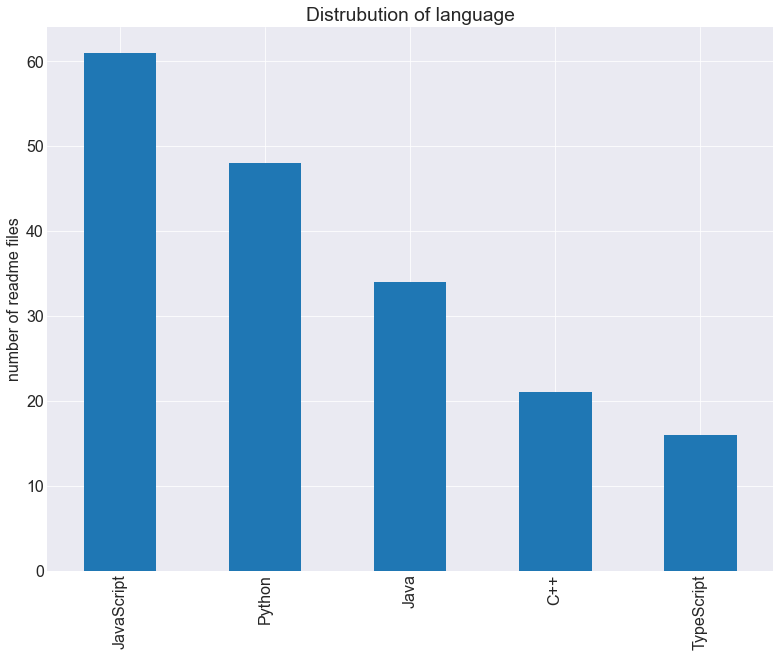

In [44]:
df.language.value_counts().plot.bar()
plt.title('Distrubution of language')
plt.ylabel('number of readme files')
plt.show()

In [45]:
#split train, validate and test
train, validate, test = prep.split_data(df, 'language')

complete df -> (180, 6)
train -> (100, 6)
validate -> (44, 6)
test -> (36, 6)


_____________

# Explore

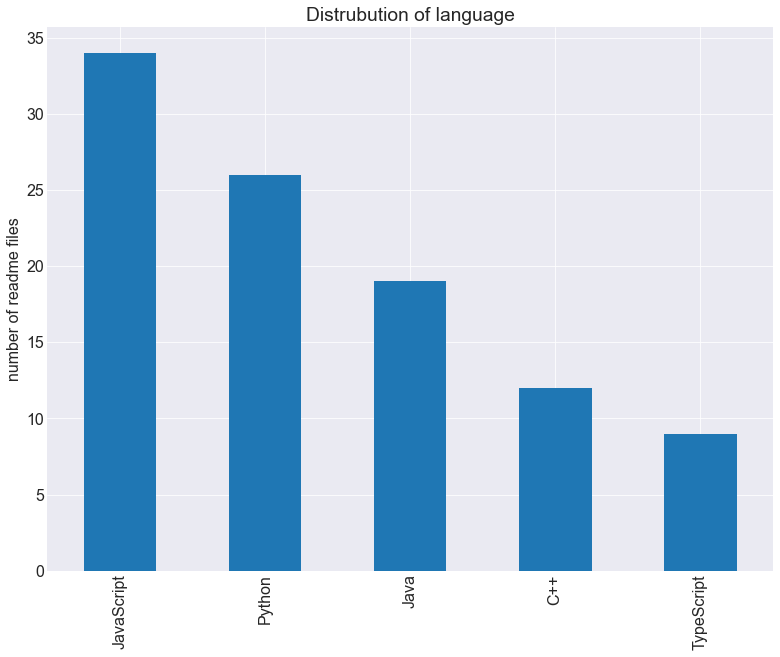

In [46]:
train.language.value_counts().plot.bar()
plt.title('Distrubution of language')
plt.ylabel('number of readme files')
plt.show()

Explore the data that you have scraped. Here are some ideas for exploration:

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?


**Note** We are going to do explore and model on lemmatized text

### - What are the most common words in READMEs?

In [47]:
#get the list of languages
list_lang = list(train.language.value_counts().index)

In [48]:
#joint all the text of each language
join_text ={}
for language in list_lang :
    join_text[language] = prep.basic_clean(' '.join(train[train.language == language].lemmatized))

#add allwords
join_text['all_words']= prep.basic_clean(' '.join(train.lemmatized))



In [49]:
#check if we have all the languages
join_text.keys()

dict_keys(['JavaScript', 'Python', 'Java', 'C++', 'TypeScript', 'all_words'])

**Represent text as word frequencies.**

In [50]:
#create a word_count df 
word_counts= pd.DataFrame()
for lang in join_text:
    word_counts[lang] = pd.Series(join_text[lang].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [51]:
word_counts.sort_values('all_words', ascending=False).head()

JavaScript  Python  Java  C++  TypeScript  all_words
learning           6     367     1   10           1        385
td               211       0   174    0           0        385
data              38     319     8    4          10        379
machine            9     348     0    6           0        363
eta              344       1     0    0           0        345

In [52]:
word_counts.shape

(7404, 6)

###  Most common words in READMEs

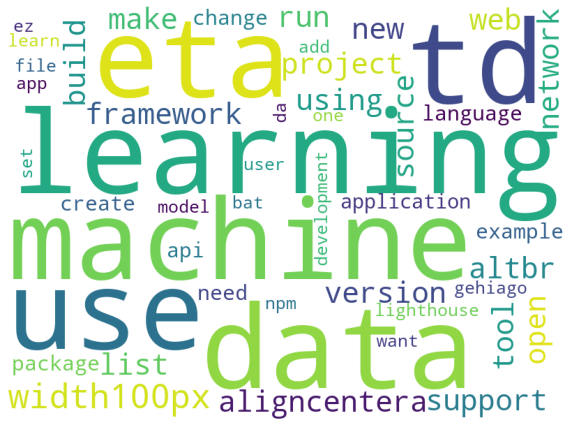

In [53]:
#use a function from explore.py
ex.wordcloud_top(word_counts, 'all_words' , 50)

#### most common words in README by type of language

<Figure size 1440x1080 with 0 Axes>

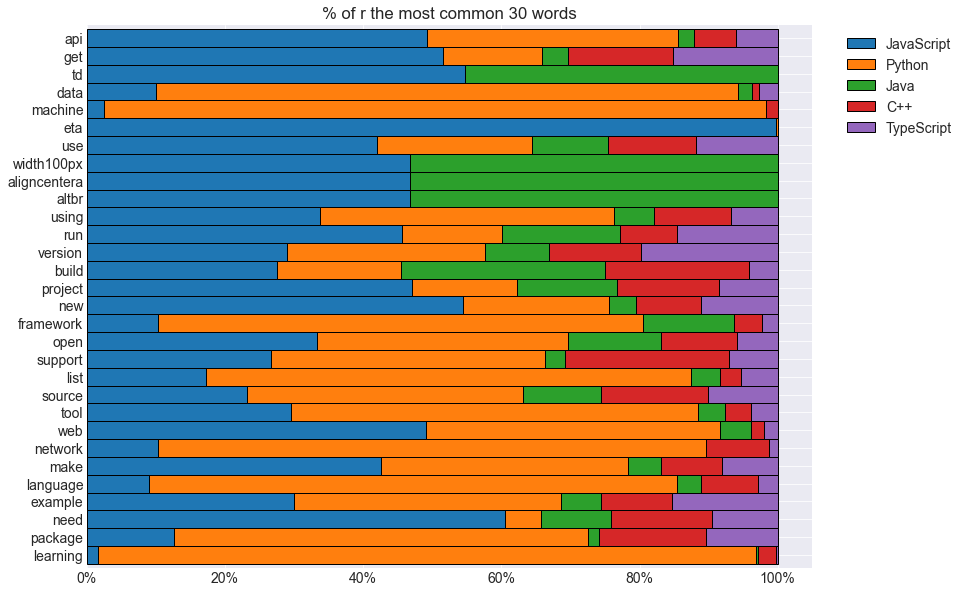

In [54]:
plt.figure(figsize=(20, 15))
plt.rc('font', size=14)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all_words', ascending=False)
 .head(30)
 .apply(lambda row: row / row['all_words'], axis=1)
 .sort_values(by='all_words')
 .drop(columns='all_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of r the most common 30 words')
plt.legend(bbox_to_anchor= (1.03,1))

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
plt.show()

### most common words sorted by each language

<Figure size 720x576 with 0 Axes>

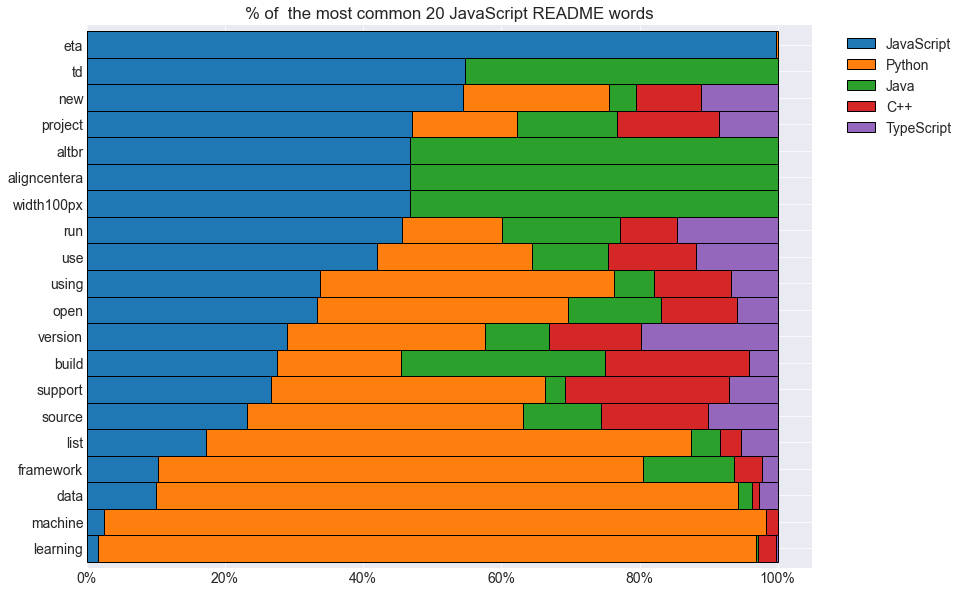

<Figure size 720x576 with 0 Axes>

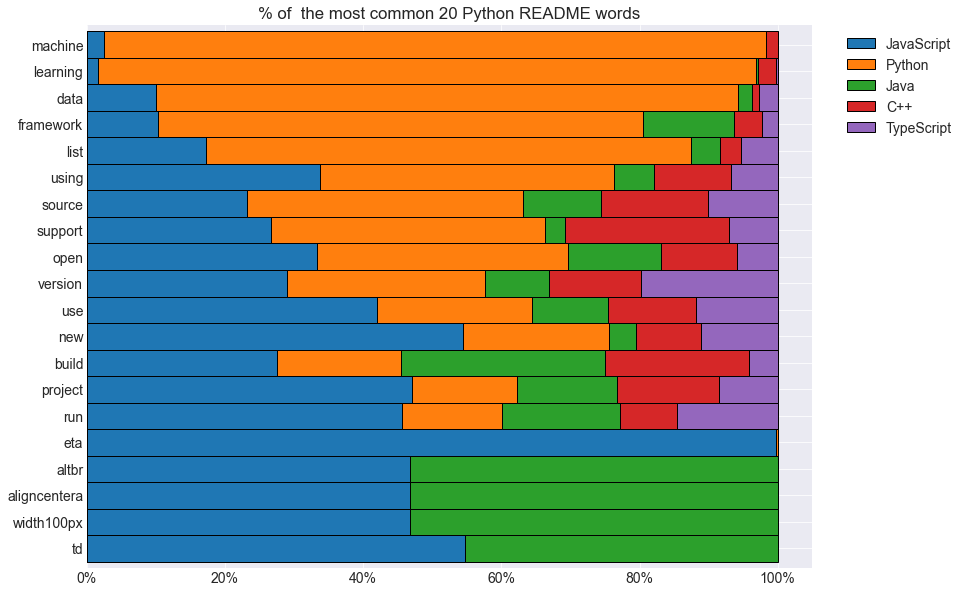

<Figure size 720x576 with 0 Axes>

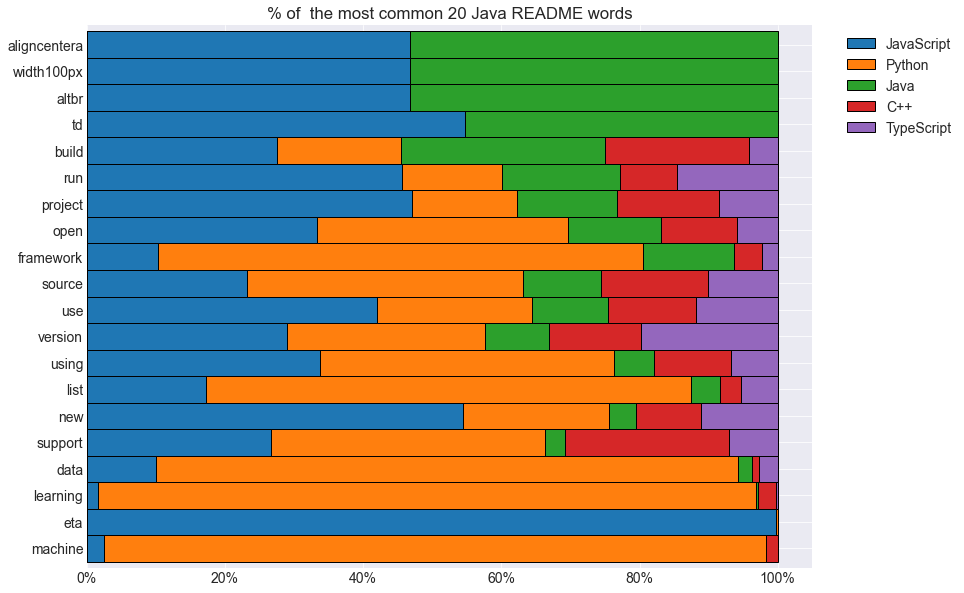

<Figure size 720x576 with 0 Axes>

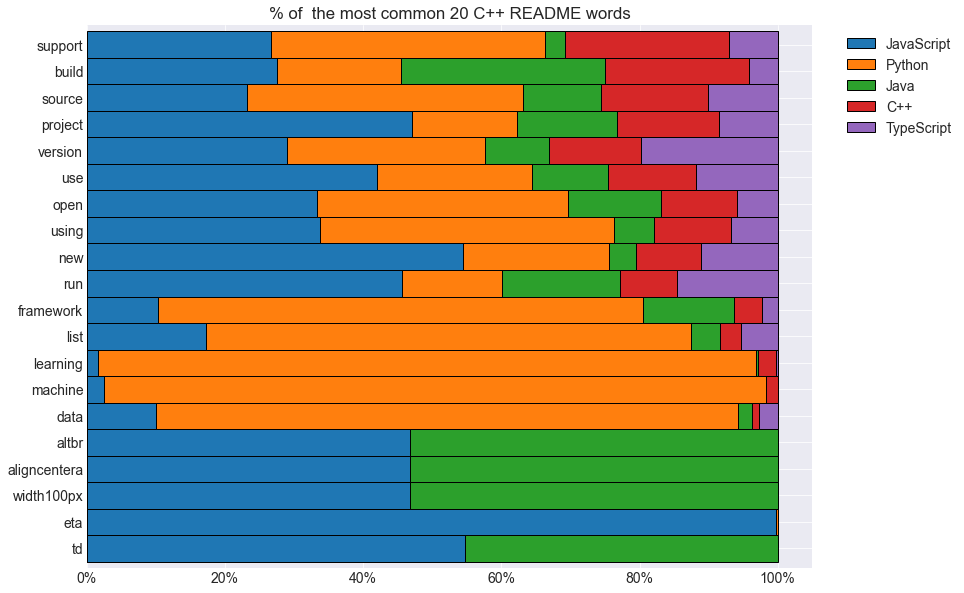

<Figure size 720x576 with 0 Axes>

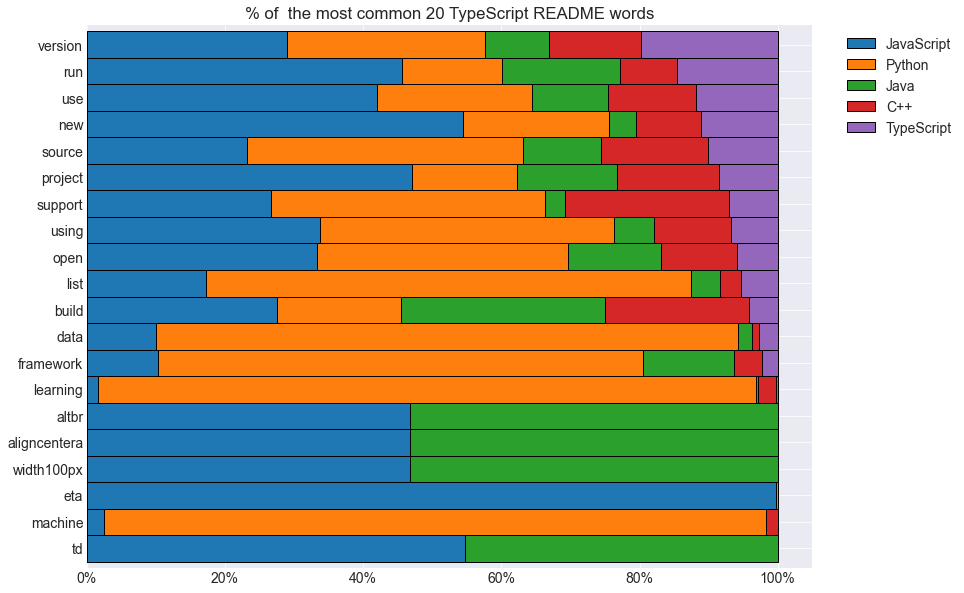

In [55]:
for column in word_counts.drop(columns='all_words'):
    plt.figure(figsize=(10, 8))
    plt.rc('font', size=14)
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all_words', ascending=False)
     .head(20)
     .apply(lambda row: row / row['all_words'], axis=1)
     .drop(columns='all_words')
     .sort_values(by= column)
     .plot.barh(stacked=True, width=1, ec='black'))
    plt.title(f'% of  the most common 20 {column} README words')
    plt.legend(bbox_to_anchor= (1.03,1))

    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
    plt.show()

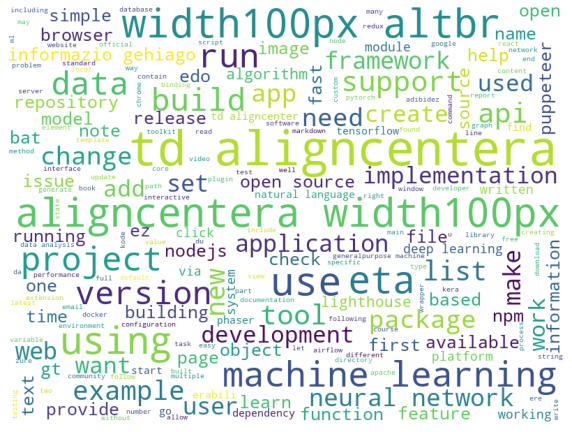

In [56]:
#this is a wordcloudd including all words
ex.word_cloud(join_text['all_words'])

In [165]:
from PIL import Image
import numpy as np

In [166]:

fig1 = np.array(Image.open('github2.png'))

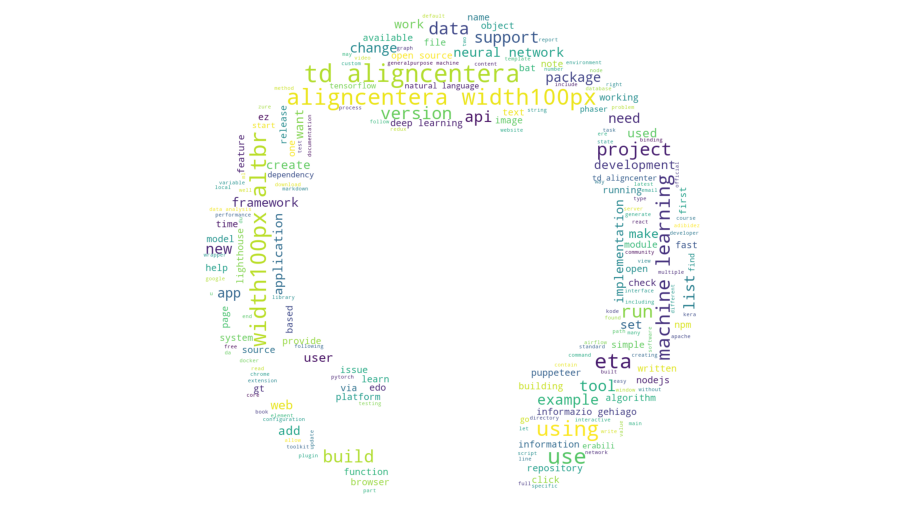

In [167]:
plt.figure(figsize=(16,16))
img = WordCloud(background_color='white', width=800, height=600, contour_color = 'black', mask = fig1).generate(join_text['all_words'])
plt.imshow(img)
plt.axis('off')
plt.show()

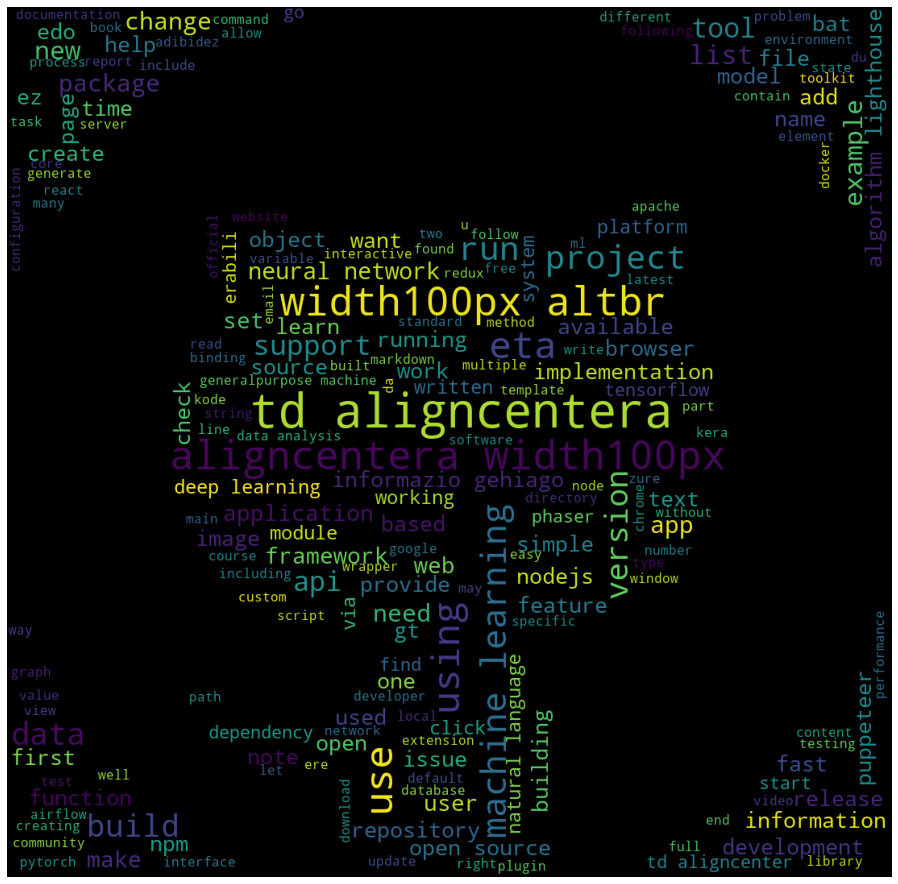

In [168]:
fig2= np.array(Image.open('github.png'))
plt.figure(figsize=(16,16))
img = WordCloud(background_color='black', width=800, height=600, contour_color = 'black', mask = fig2).generate(join_text['all_words'])
plt.imshow(img)
plt.axis('off')
plt.show()

### Top 50 words 

 ********************* Language : JavaScript *********************


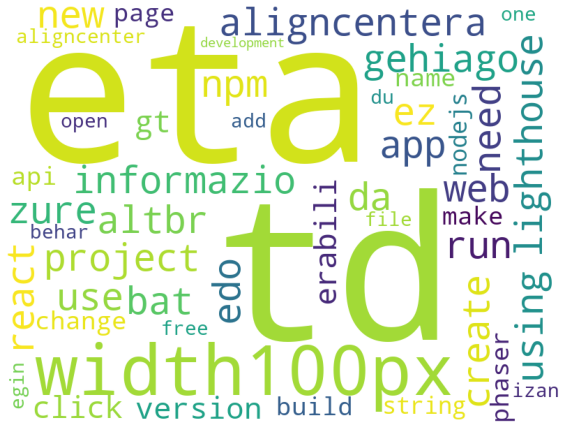

 
 ********************* Language : Python *********************


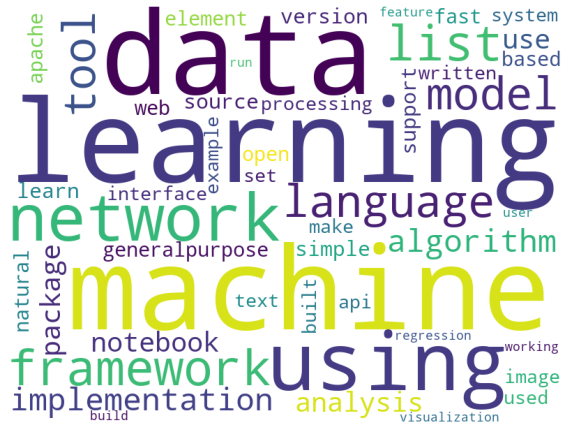

 
 ********************* Language : Java *********************


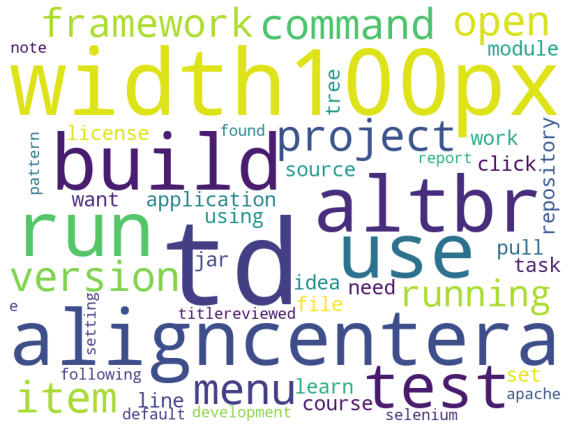

 
 ********************* Language : C++ *********************


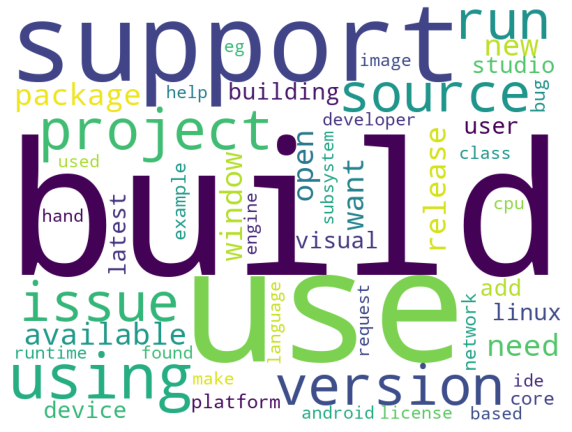

 
 ********************* Language : TypeScript *********************


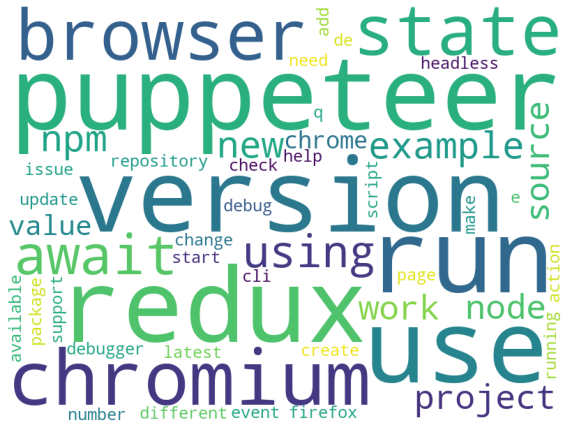

 
 ********************* Language : all_words *********************


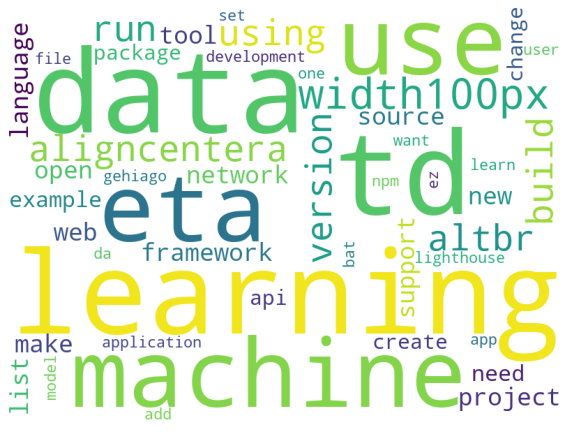

In [57]:
# top 50 word for each language
for col in word_counts.columns:
    print (f' ********************* Language : {col} *********************')
    ex.wordcloud_top(word_counts, col ,50)
    print(' ')

### bigrams

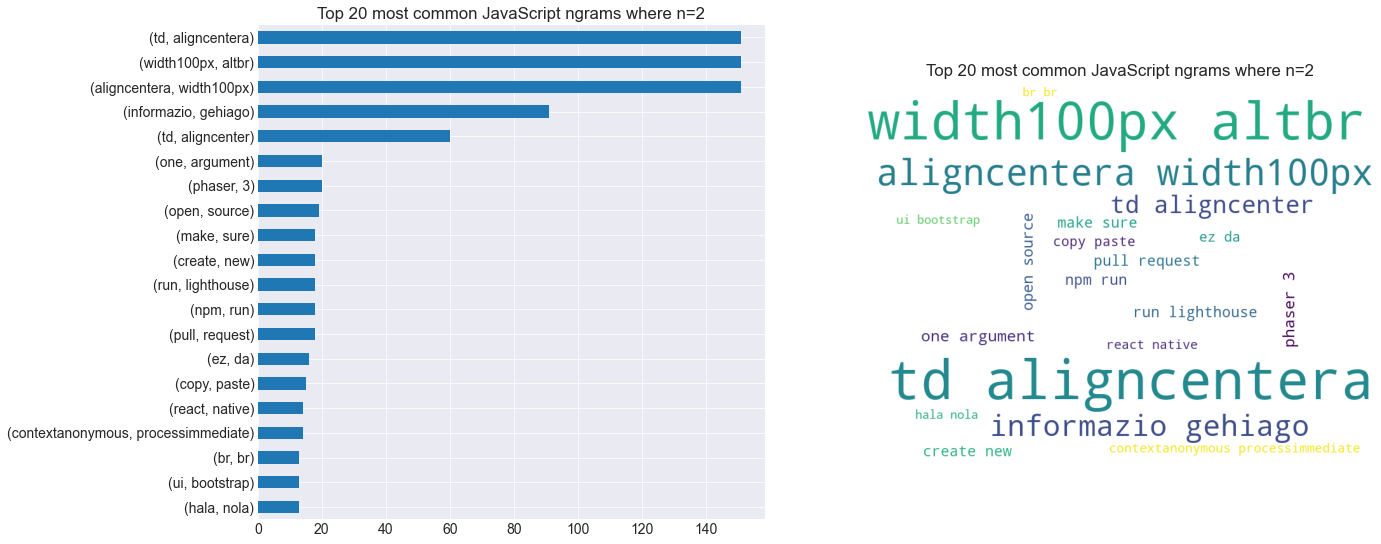

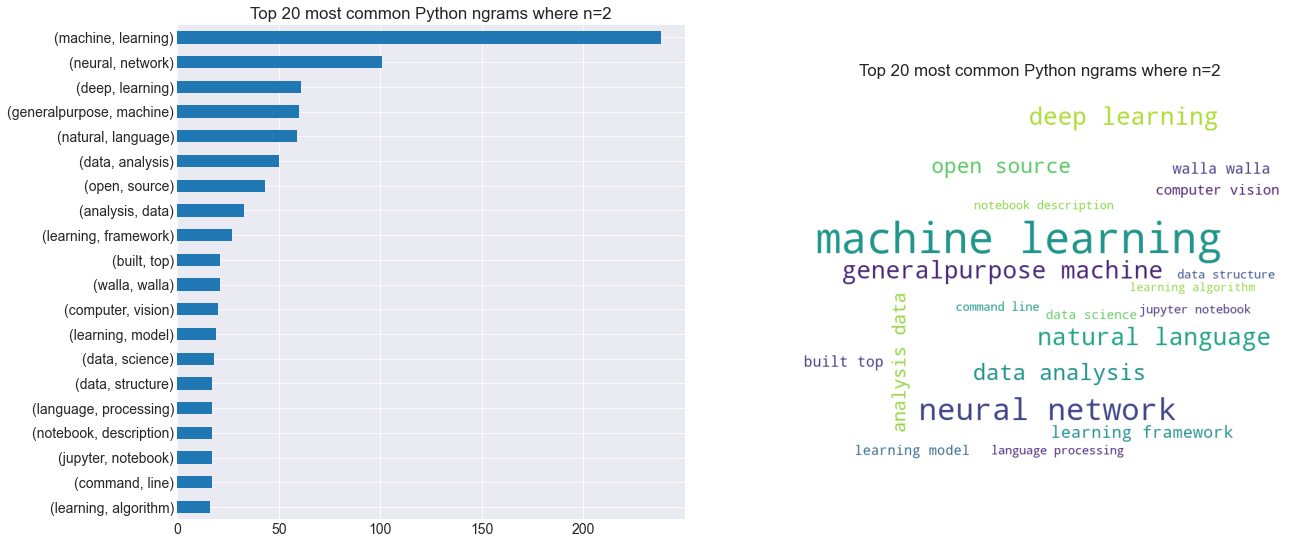

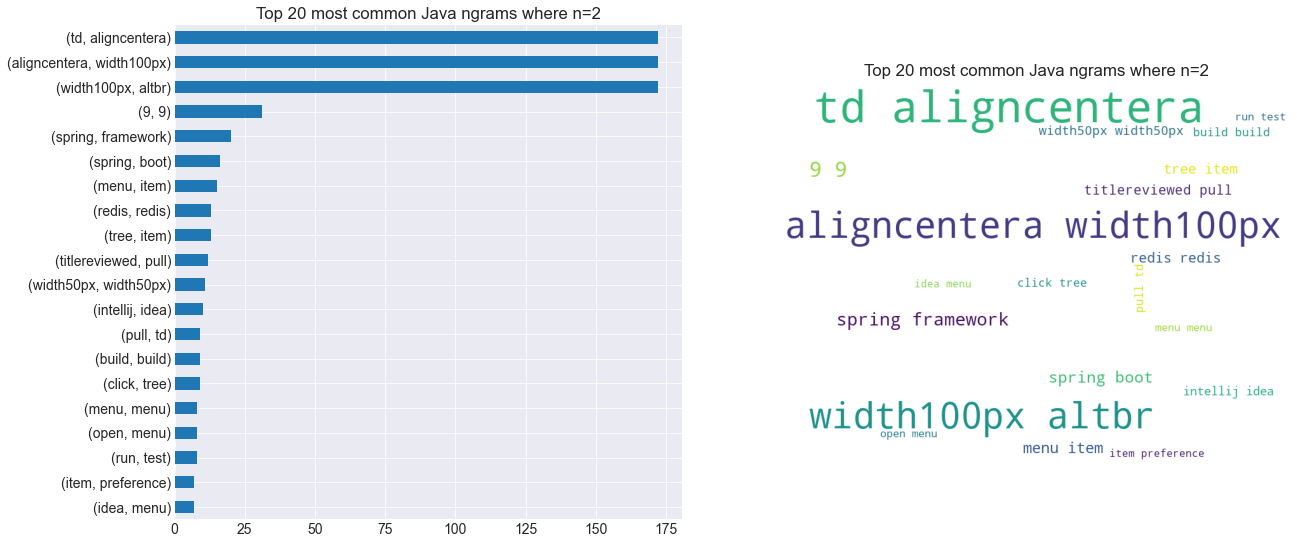

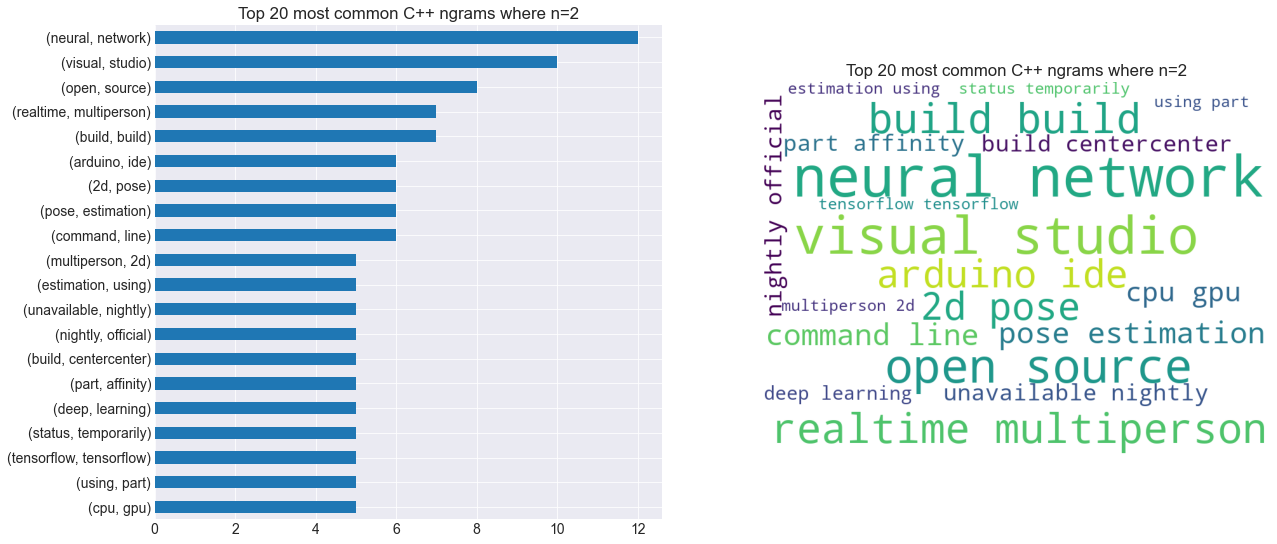

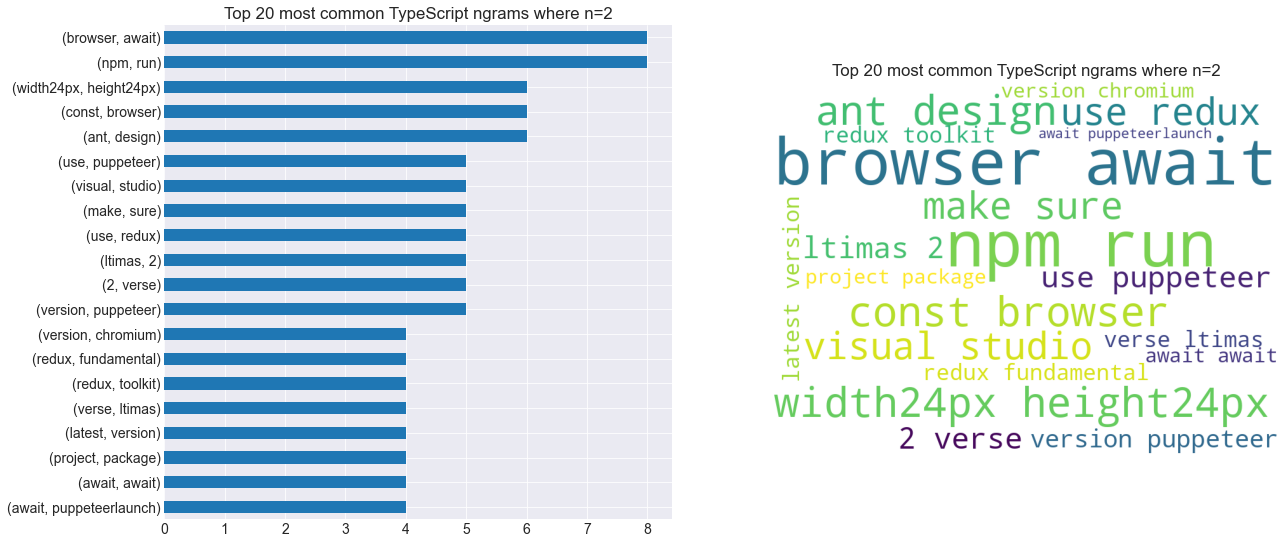

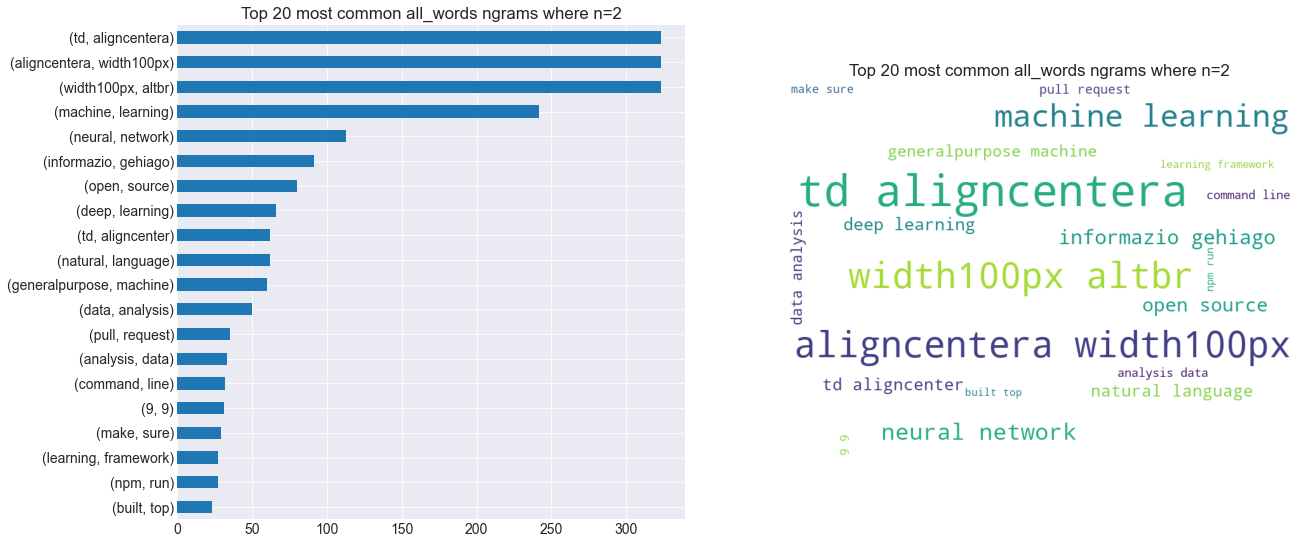

In [58]:
#use a function from explore.py
for key in join_text.keys():
    print (' ')
    ex.ngrams_wordcloud(join_text[key], key)
    print (' ')

### - What does the distribution of IDFs look like for the most common words?**

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
# # our 3 example documents
# documents = {
#     'news': 'Codeup announced last thursday that they just launched a new data science program. It is 18 weeks long.',
#     'description': 'Codeup\'s data science program teaches hands on skills using Python and pandas.',
#     'context': 'Codeup\'s data science program was created in response to a percieved lack of data science talent, and growing demand.'
# }
# print(documents)

# print('\nCleaning and lemmatizing...\n')

# documents = {topic: prep.lemmatize(prep.basic_clean(documents[topic])) for topic in documents}



In [61]:
# documents

In [62]:
# # A simple way to calculate idf for demonstration. Note that this
# # function relies on the globally defined documents variable.
# def idf(word):
#     n_occurences = sum([1 for doc in documents.values() if word in doc])
#     return len(documents) / n_occurences

# # Get a list of the unique words
# unique_words = pd.Series(' '.join(documents.values()).split()).unique()

# # put the unique words into a data frame
# (pd.DataFrame(dict(word=unique_words))
#  # calculate the idf for each word
#  .assign(idf=lambda df: df.word.apply(idf))
#  # sort the data for presentation purposes
#  .set_index('word')
#  .sort_values(by='idf', ascending=False)
#  .head(5))

In [63]:
# # Get a list of the unique words
# pd.Series(' '.join(documents.values()).split()).unique()

In [64]:
#len(documents)

In [65]:
len(join_text)

6

In [66]:
#join_text.pop("all_words")

In [67]:
def idf(word):
    'calculate idf for a word'
    n_occurences = sum([1 for doc in join_text.values() if word in doc])
    return len(join_text) / n_occurences

In [68]:
# Get a list of the unique words
unique_words = pd.Series(' '.join(join_text.values()).split()).unique()

In [69]:
len(unique_words)

12412

In [70]:
#let's check a single word
idf('build')

1.0

In [71]:
# put the unique words into a data frame
idf_df =(pd.DataFrame(dict(word=unique_words))
# calculate the idf for each word
.assign(idf=lambda train: train.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False))

In [72]:
idf_df.head()

idf
word                 
deem              3.0
jdbch2memtestdb   3.0
fixedimplemented  3.0
theyve            3.0
standardsbased    3.0

In [73]:
#these are the most common words idf =1
idf_df[idf_df.idf==1].head()

idf
word      
oso    1.0
team   1.0
like   1.0
used   1.0
table  1.0

In [74]:
len(idf_df[idf_df.idf==1])

865

In [75]:
len(idf_df)

12412

In [76]:
#we can see
len(idf_df[idf_df.idf==1]) /len(idf_df)

0.06969062197873026

In [77]:
# 7 % of the total words are the most common

In [78]:
idf_df.groupby(idf).count()

idf
1.0   865
1.2   523
1.5   735
2.0  1369
3.0  8920

<AxesSubplot:>

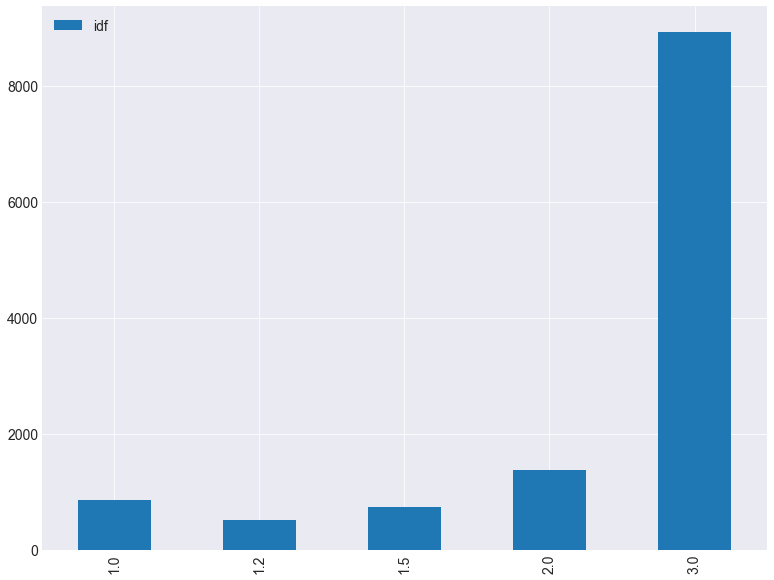

In [79]:
idf_df.groupby(idf).count().plot.bar()

### Does the length of the README vary by programming language?**

In [80]:
#create a column with readme lenght
train['readme_length'] = train.lemmatized.apply(len)

In [81]:
train.head()

repo    language  \
38                 microsoft/vscode  TypeScript   
32                      nodejs/node  JavaScript   
150  goldbergyoni/nodebestpractices  JavaScript   
26                  macrozheng/mall        Java   
56              home-assistant/core      Python   

                                       readme_contents  \
38   # Visual Studio Code - Open Source ("Code - OS...   
32   <!--lint disable no-literal-urls-->\n<p align=...   
150  [✔]: assets/images/checkbox-small-blue.png\n\n...   
26   # mall\n\n<p>\n  <a href="#公众号"><img src="http...   
56   Home Assistant |Chat Status|\n================...   

                                                 clean  \
38   visual studio open source repository oss micro...   
32   lint disable opensource crossplatform runtime ...   
150  nodejsren praktika srcassetsimagesbanner2jpg a...   
26   hrefimg hrefimg 1 2 3 spring cloud hoxton 4 5 ...   
56   home assistant chat source home automation put...   

                                               stemmed  \
38   visual studio open sourc repositori oss micros...   
32   lint disabl opensourc crossplatform runtim env...   
150  nodejsren praktika srcassetsimagesbanner2jpg a...   
26   hrefimg hrefimg 1 2 3 spring cloud hoxton 4 5 ...   
56   home assist chat sourc home autom put local co...   

                                            lemmatized  readme_length  
38   visual studio open source repository os micros...           2045  
32   lint disable opensource crossplatform runtime ...           5639  
150  nodejsren praktika srcassetsimagesbanner2jpg a...          82676  
26   hrefimg hrefimg 1 2 3 spring cloud hoxton 4 5 ...            756  
56   home assistant chat source home automation put...            504

In [82]:
train.groupby('language').readme_length.mean()


language
C++           2912.083333
Java          2077.526316
JavaScript    5949.823529
Python        6193.269231
TypeScript    3267.111111
Name: readme_length, dtype: float64

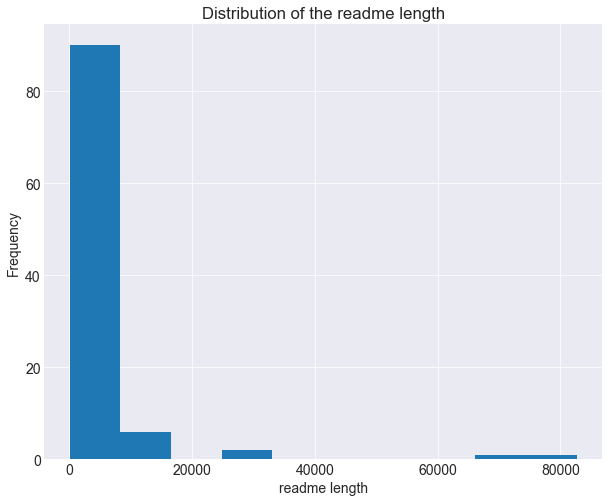

In [83]:
plt.figure(figsize=(10,8))
train.readme_length.plot.hist()
plt.xlabel('readme length')
plt.title ('Distribution of the readme length')
plt.show()

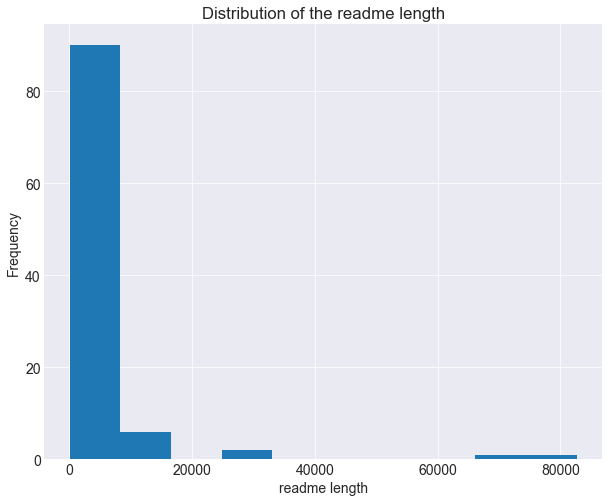

In [84]:
plt.figure(figsize=(10,8))
train.readme_length.plot.hist()
plt.xlabel('readme length')
plt.title ('Distribution of the readme length')
plt.show()

### word counts

In [85]:
#create a new column
train['word_count'] = train.lemmatized.apply(prep.basic_clean).apply(str.split).apply(len)

In [86]:
train.head()

repo    language  \
38                 microsoft/vscode  TypeScript   
32                      nodejs/node  JavaScript   
150  goldbergyoni/nodebestpractices  JavaScript   
26                  macrozheng/mall        Java   
56              home-assistant/core      Python   

                                       readme_contents  \
38   # Visual Studio Code - Open Source ("Code - OS...   
32   <!--lint disable no-literal-urls-->\n<p align=...   
150  [✔]: assets/images/checkbox-small-blue.png\n\n...   
26   # mall\n\n<p>\n  <a href="#公众号"><img src="http...   
56   Home Assistant |Chat Status|\n================...   

                                                 clean  \
38   visual studio open source repository oss micro...   
32   lint disable opensource crossplatform runtime ...   
150  nodejsren praktika srcassetsimagesbanner2jpg a...   
26   hrefimg hrefimg 1 2 3 spring cloud hoxton 4 5 ...   
56   home assistant chat source home automation put...   

                                               stemmed  \
38   visual studio open sourc repositori oss micros...   
32   lint disabl opensourc crossplatform runtim env...   
150  nodejsren praktika srcassetsimagesbanner2jpg a...   
26   hrefimg hrefimg 1 2 3 spring cloud hoxton 4 5 ...   
56   home assist chat sourc home autom put local co...   

                                            lemmatized  readme_length  \
38   visual studio open source repository os micros...           2045   
32   lint disable opensource crossplatform runtime ...           5639   
150  nodejsren praktika srcassetsimagesbanner2jpg a...          82676   
26   hrefimg hrefimg 1 2 3 spring cloud hoxton 4 5 ...            756   
56   home assistant chat source home automation put...            504   

     word_count  
38          257  
32          730  
150        9947  
26          101  
56           63

<Figure size 1440x360 with 0 Axes>

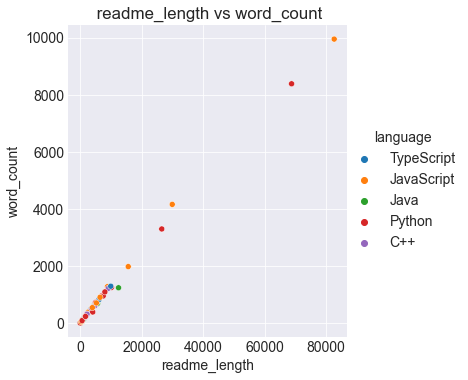

In [87]:
plt.rc('figure', figsize=(20, 10))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= (20,5))
sns.relplot(data=train, y='word_count', x='readme_length', hue='language')
plt.title( " readme_length vs word_count")
plt.show()

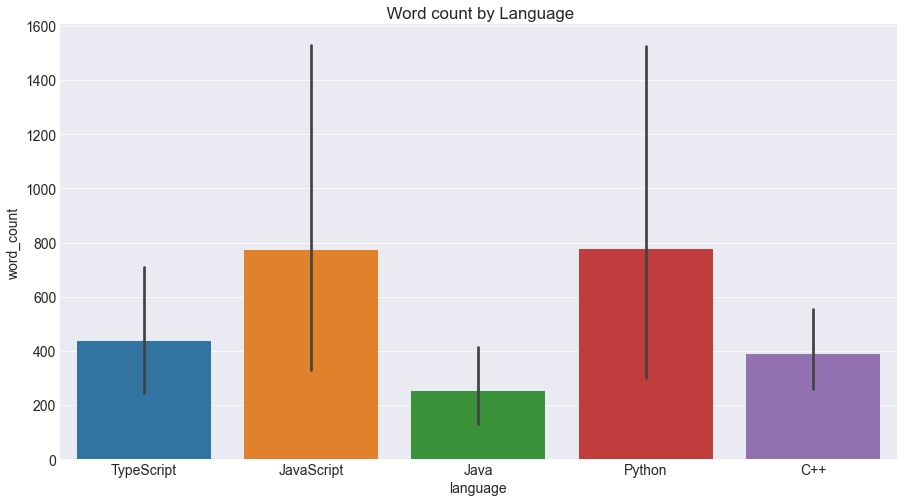

In [88]:
plt.figure(figsize= (15,8))
sns.barplot(data=train, y='word_count', x='language')
plt.title (' Word count by Language')
plt.show()

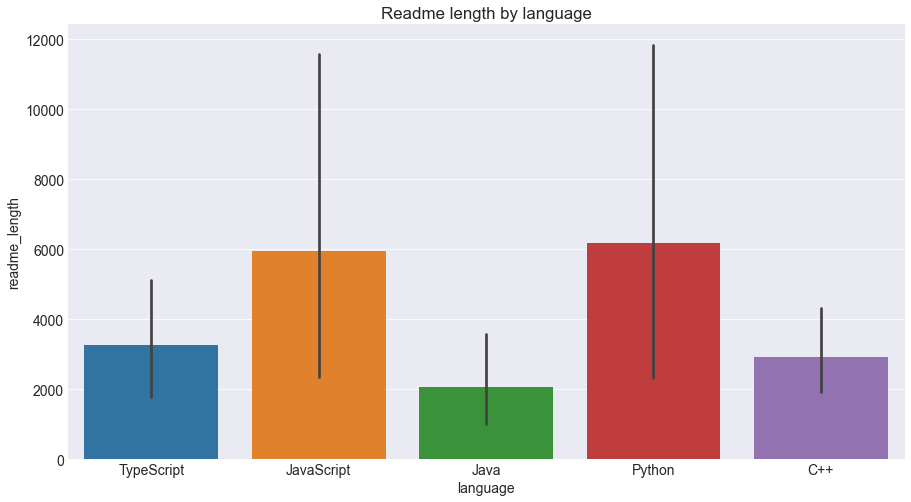

In [89]:
plt.figure(figsize= (15,8))
sns.barplot(data=train, y='readme_length', x='language')
plt.title("Readme length by language")
plt.show()

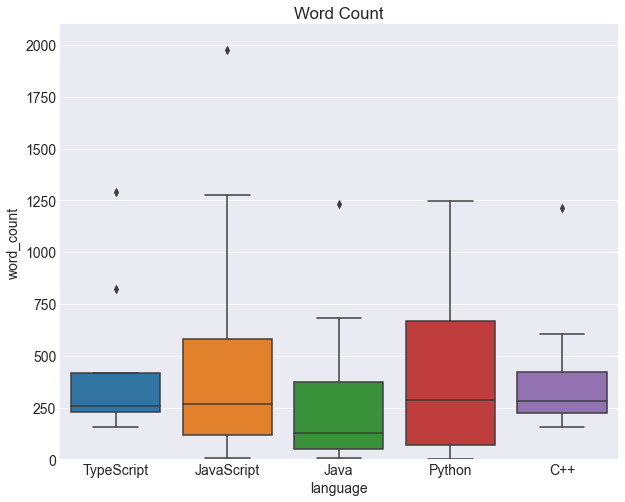

In [90]:
plt.figure(figsize= (10,8))
sns.boxplot(x='language',y ='word_count', data= train)
plt.ylim(0, 2100)
plt.title( 'Word Count')
plt.show()

(0.0, 16000.0)

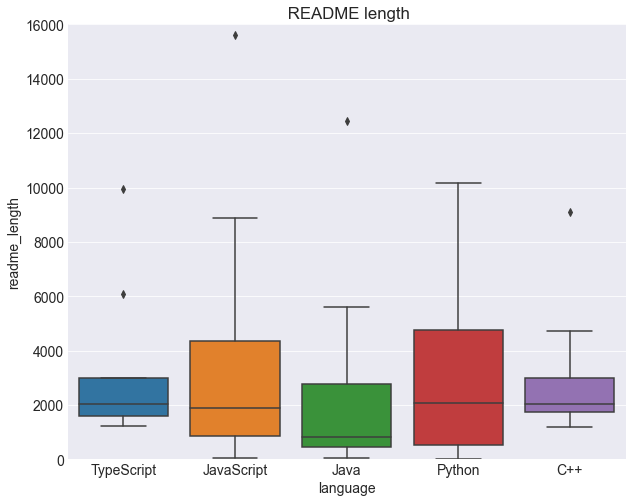

In [91]:
plt.figure(figsize= (10,8))
sns.boxplot(x='language',y ='readme_length', data= train)
plt.title(' README length')
plt.ylim(0, 16000)

In [92]:
train.groupby('language').word_count.mean()

language
C++           387.583333
Java          253.736842
JavaScript    770.823529
Python        778.000000
TypeScript    436.333333
Name: word_count, dtype: float64

In [93]:
train.groupby('language').word_count.median()

language
C++           283.0
Java          126.0
JavaScript    267.5
Python        284.0
TypeScript    257.0
Name: word_count, dtype: float64

### Do different programming languages use a different number of unique words?

In [94]:
uniq_words={}
# Get a list of the unique words by language
for key in join_text:
    uniq_words [key] =  list(pd.Series(join_text[key].split()).unique())
    


In [95]:
uniq_words.keys()

dict_keys(['JavaScript', 'Python', 'Java', 'C++', 'TypeScript', 'all_words'])

******************************UNIQUE WORDS FOR JavaScript ***************************** 


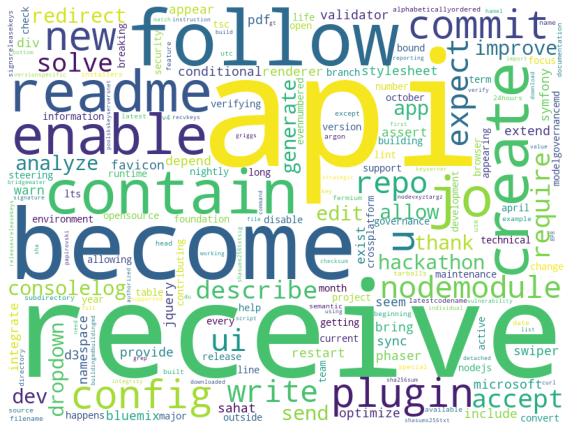

******************************UNIQUE WORDS FOR Python ***************************** 


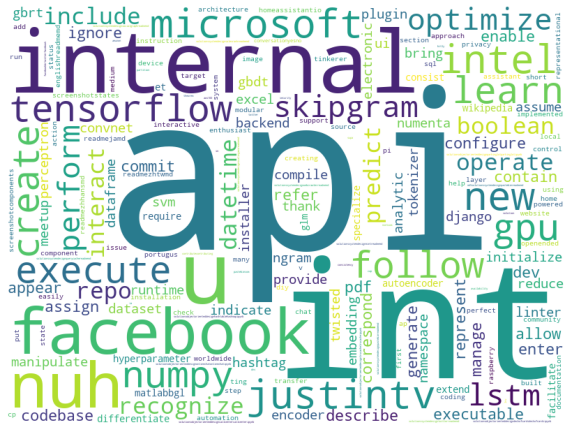

******************************UNIQUE WORDS FOR Java ***************************** 


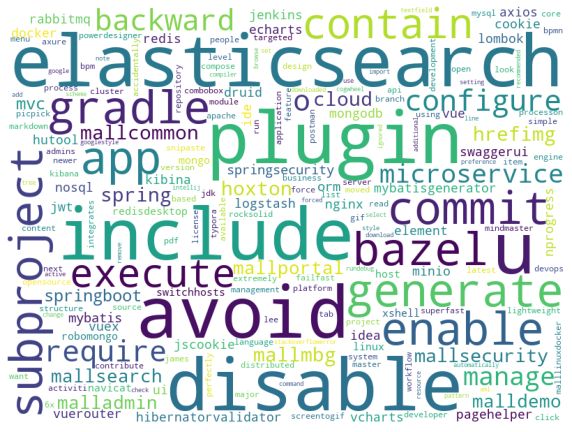

******************************UNIQUE WORDS FOR C++ ***************************** 


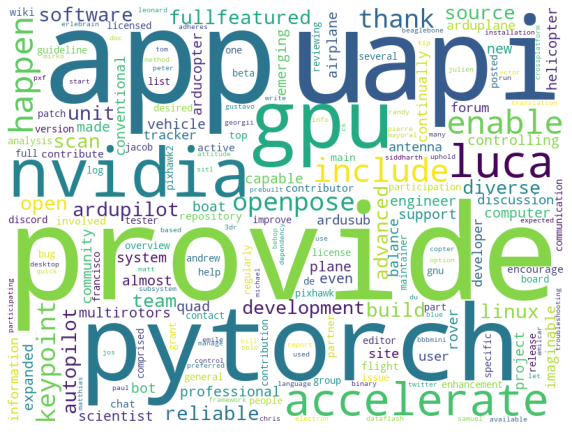

******************************UNIQUE WORDS FOR TypeScript ***************************** 


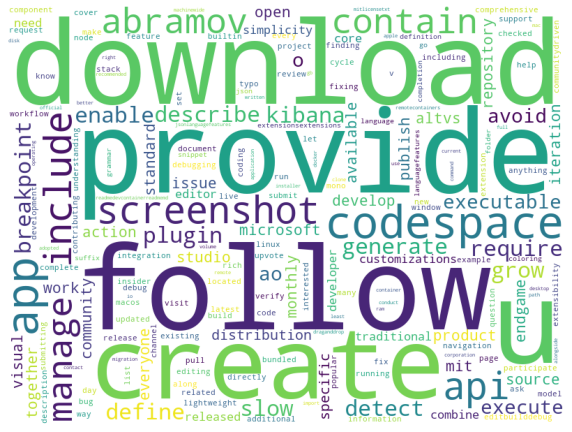

******************************UNIQUE WORDS FOR all_words ***************************** 


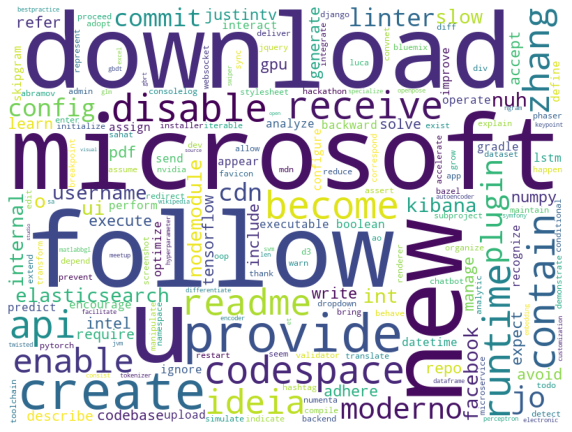

In [96]:
for key in uniq_words:    
    print(f'******************************UNIQUE WORDS FOR {key} ***************************** ')
    ex.word_cloud (' '.join(uniq_words[key]))

In [97]:
len(uniq_words['JavaScript'])

7404

In [98]:
#create a dictionary of how many unique words each language have in their readme files
len_uniq_df={}
for key in uniq_words:
    len_uniq_df[key] = len(uniq_words[key])
    

In [99]:
#create a df of unique words by language
uni_by_lang = pd.DataFrame(len_uniq_df, index= ['unique_words'])

In [100]:
uni_by_lang

JavaScript  Python  Java   C++  TypeScript  all_words
unique_words        7404    4728  1737  1837        1505      12412

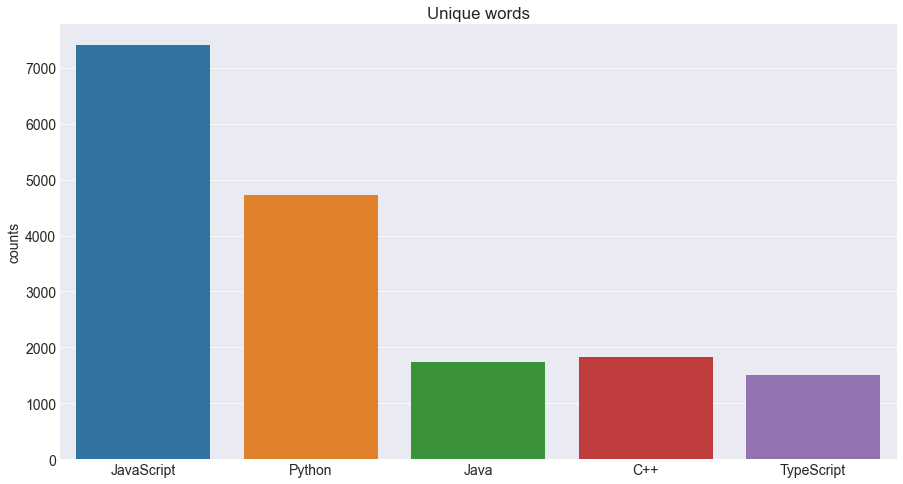

In [101]:
plt.figure(figsize= (15,8))
sns.barplot(data=uni_by_lang.drop(columns=['all_words']))
plt.ylabel('counts')
plt.title("Unique words")
plt.show()

In [102]:
## finish ********

In [103]:
string = 'statushttpsgithubcomh5bphtml5boilerplateworkflowsbuild20statusbadgesvghttpsgithubcomh5bphtml5boilerplateactionsqueryworkflow3a22buildstatus22branch3amaster licensehttpsimgshieldsiobadgelicensemitlightgreysvghttpsgithubcomh5bphtml5boilerplateblobmasterlicensetxt devdependency statushttpsdaviddmorgh5bphtml5boilerplatedevstatussvghttpsdaviddmorgh5bphtml5boilerplateinfodevdependencies npm downloadshttpsimgshieldsionpmdthtml5boilerplatesvghttpswwwnpmjscompackagehtml5boilerplate githubstarsimagehttpsimgshieldsiogithubstarsh5bphtml5boilerplatesvglabelgithub20starshttpsgithubcomh5bphtml5boilerplate html5 boilerplate professional frontend template building fast robust adaptable web apps site project product 10 year iterative development community knowledge impose specific development philosophy framework youre free architect code way want homepage httpshtml5boilerplatecomhttpshtml5boilerplatecom source httpsgithubcomh5bphtml5boilerplatehttpsgithubcomh5bphtml5boilerplate twitter h5bphttpstwittercomh5bp quick start choose one following option download latest stable  github github release html5boilerplatecomhttpshtml5boilerplatecom'

In [104]:
prep.remove_stopwords(string, ['http'])

'statushttpsgithubcomh5bphtml5boilerplateworkflowsbuild20statusbadgesvghttpsgithubcomh5bphtml5boilerplateactionsqueryworkflow3a22buildstatus22branch3amaster licensehttpsimgshieldsiobadgelicensemitlightgreysvghttpsgithubcomh5bphtml5boilerplateblobmasterlicensetxt devdependency statushttpsdaviddmorgh5bphtml5boilerplatedevstatussvghttpsdaviddmorgh5bphtml5boilerplateinfodevdependencies npm downloadshttpsimgshieldsionpmdthtml5boilerplatesvghttpswwwnpmjscompackagehtml5boilerplate githubstarsimagehttpsimgshieldsiogithubstarsh5bphtml5boilerplatesvglabelgithub20starshttpsgithubcomh5bphtml5boilerplate html5 boilerplate professional frontend template building fast robust adaptable web apps site project product 10 year iterative development community knowledge impose specific development philosophy framework youre free architect code way want homepage httpshtml5boilerplatecomhttpshtml5boilerplatecom source httpsgithubcomh5bphtml5boilerplatehttpsgithubcomh5bphtml5boilerplate twitter h5bphttpstwitte

In [105]:

import re
regexp = r'\w*github\w*'

re.sub(regexp, '', string)


'  devdependency statushttpsdaviddmorgh5bphtml5boilerplatedevstatussvghttpsdaviddmorgh5bphtml5boilerplateinfodevdependencies npm downloadshttpsimgshieldsionpmdthtml5boilerplatesvghttpswwwnpmjscompackagehtml5boilerplate  html5 boilerplate professional frontend template building fast robust adaptable web apps site project product 10 year iterative development community knowledge impose specific development philosophy framework youre free architect code way want homepage httpshtml5boilerplatecomhttpshtml5boilerplatecom source  twitter h5bphttpstwittercomh5bp quick start choose one following option download latest stable    release html5boilerplatecomhttpshtml5boilerplatecom'

# Modeling

In [107]:
# imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text


In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer   

## - bag of words

In [109]:
# we are going to use bags of word to create models
cv = CountVectorizer()
X = cv.fit_transform(df.lemmatized)
y = df.language

In [110]:
# split
X_train, y_train, X_validate, y_validate, X_test, y_test = mo.nlp_xy_split (X,y)

X_train -> (100, 18158)               y_train->(100,)
X_validate -> (44, 18158)         y_validate->(44,) 
X_test -> (36, 18158)                  y_test>(36,)


In [111]:
#create a df to store metrics
metric_df =pd.DataFrame(columns= ['model_name', 'train_score', 'validate_score'])

In [112]:
metric_df

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

## Baseline

In [113]:
#look ar most common language
y_train.value_counts()

JavaScript    34
Python        26
Java          19
C++           12
TypeScript     9
Name: language, dtype: int64

In [114]:
from sklearn.dummy import DummyClassifier

In [115]:
#create the object
baseline = DummyClassifier(strategy='constant', constant='JavaScript')
#fir the object
baseline.fit(X_train, y_train)
# accuracy
base_acc = baseline.score(X_train, y_train)


In [116]:
metric_df =metric_df.append({'model_name': 'baseline', 'train_score': base_acc}, ignore_index = True)


In [117]:
metric_df

model_name  train_score  validate_score
0   baseline         0.34             NaN

## Decision Tree

In [118]:
# fit the selected model
d_tree = DecisionTreeClassifier(max_depth=5)
model = d_tree.fit(X_train, y_train)


In [119]:
#using a function from model.py
res = mo.compare_train_val(model,'train',X_train, y_train,'validate', X_validate, y_validate, 'dec_tree')


    ******    train       ******                              ******     validate    ****** 
       Overall Accuracy:  75.00%              |                Overall Accuracy:  52.27%  
                                                

    _________________________________________________________________________________
    


train Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 10 
 0 
 2 
 0 
 0 
 
 
 a_Python 
 0 
 19 
 0 
 0 
 0 
 
 
 a_Java 
 1 
 6 
 27 
 0 
 0 
 
 
 a_C++ 
 0 
 9 
 3 
 14 
 0 
 
 
 a_TypeScript 
 1 
 2 
 1 
 0 
 5 
 
                           validate Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 1 
 2 
 1 
 1 
 0 
 
 
 a_Python 
 1 
 5 
 2 
 0 
 0 
 
 
 a_Java 
 0 
 6 
 8 
 0 
 1 
 
 
 a_C++ 
 0 
 2 
 1 
 9 
 0 
 
 
 a_TypeScript 
 0 
 1 
 3 
 0 
 0


    ________________________________________________________________________________
    
    Classification Report:
    


train Classification Report precision recall f1-score support 
 
 C++ 
 0.833333 
 0.833333 
 0.833333 
 12.000000 
 
 
 Java 
 0.527778 
 1.000000 
 0.690909 
 19.000000 
 
 
 JavaScript 
 0.818182 
 0.794118 
 0.805970 
 34.000000 
 
 
 Python 
 1.000000 
 0.538462 
 0.700000 
 26.000000 
 
 
 TypeScript 
 1.000000 
 0.555556 
 0.714286 
 9.000000 
 
 
 accuracy 
 0.750000 
 0.750000 
 0.750000 
 0.750000 
 
 
 macro avg 
 0.835859 
 0.744294 
 0.748900 
 100.000000 
 
 
 weighted avg 
 0.828460 
 0.750000 
 0.751588 
 100.000000 
 
                                               validate Classification Report precision recall f1-score support 
 
 C++ 
 0.500000 
 0.200000 
 0.285714 
 5.000000 
 
 
 Java 
 0.312500 
 0.625000 
 0.416667 
 8.000000 
 
 
 JavaScript 
 0.533333 
 0.533333 
 0.533333 
 15.000000 
 
 
 Python 
 0.900000 
 0.750000 
 0.818182 
 12.000000 
 
 
 TypeScript 
 0.000000 
 0.000000 
 0.000000 
 4.000000 
 
 
 accuracy 
 0.522727 
 0.522727 
 0.522727 
 0.522727 
 
 
 macro avg 
 0.449167 
 0.421667 
 0.410779 
 44.000000 
 
 
 weighted avg 
 0.540909 
 0.522727 
 0.513184 
 44.000000

In [120]:
#add metrics
metric_df = metric_df.append(res, ignore_index = True)
metric_df

model_name  train_score  validate_score
0   baseline         0.34             NaN
1   dec_tree         0.75        0.522727

## Naive_Bayes

In [121]:
#fit
nb= MultinomialNB(alpha= 0.5, fit_prior= False )
model2 =nb.fit(X_train, y_train)


In [122]:
res = mo.compare_train_val(model2,'train',X_train, y_train,'validate', X_validate, y_validate, 'naive_bayes')


    ******    train       ******                              ******     validate    ****** 
       Overall Accuracy:  100.00%              |                Overall Accuracy:  61.36%  
                                                

    _________________________________________________________________________________
    


train Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 12 
 0 
 0 
 0 
 0 
 
 
 a_Python 
 0 
 19 
 0 
 0 
 0 
 
 
 a_Java 
 0 
 0 
 34 
 0 
 0 
 
 
 a_C++ 
 0 
 0 
 0 
 26 
 0 
 
 
 a_TypeScript 
 0 
 0 
 0 
 0 
 9 
 
                           validate Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 3 
 0 
 0 
 2 
 0 
 
 
 a_Python 
 2 
 1 
 1 
 4 
 0 
 
 
 a_Java 
 1 
 1 
 10 
 1 
 2 
 
 
 a_C++ 
 0 
 0 
 0 
 12 
 0 
 
 
 a_TypeScript 
 0 
 0 
 2 
 1 
 1


    ________________________________________________________________________________
    
    Classification Report:
    


train Classification Report precision recall f1-score support 
 
 C++ 
 1.000000 
 1.000000 
 1.000000 
 12.000000 
 
 
 Java 
 1.000000 
 1.000000 
 1.000000 
 19.000000 
 
 
 JavaScript 
 1.000000 
 1.000000 
 1.000000 
 34.000000 
 
 
 Python 
 1.000000 
 1.000000 
 1.000000 
 26.000000 
 
 
 TypeScript 
 1.000000 
 1.000000 
 1.000000 
 9.000000 
 
 
 accuracy 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 macro avg 
 1.000000 
 1.000000 
 1.000000 
 100.000000 
 
 
 weighted avg 
 1.000000 
 1.000000 
 1.000000 
 100.000000 
 
                                               validate Classification Report precision recall f1-score support 
 
 C++ 
 0.500000 
 0.600000 
 0.545455 
 5.000000 
 
 
 Java 
 0.500000 
 0.125000 
 0.200000 
 8.000000 
 
 
 JavaScript 
 0.769231 
 0.666667 
 0.714286 
 15.000000 
 
 
 Python 
 0.600000 
 1.000000 
 0.750000 
 12.000000 
 
 
 TypeScript 
 0.333333 
 0.250000 
 0.285714 
 4.000000 
 
 
 accuracy 
 0.613636 
 0.613636 
 0.613636 
 0.613636 
 
 
 macro avg 
 0.540513 
 0.528333 
 0.499091 
 44.000000 
 
 
 weighted avg 
 0.603904 
 0.613636 
 0.572373 
 44.000000

In [123]:
#add metrics
metric_df = metric_df.append(res, ignore_index = True)
metric_df

model_name  train_score  validate_score
0     baseline         0.34             NaN
1     dec_tree         0.75        0.522727
2  naive_bayes         1.00        0.613636

## Random Forest

In [124]:

# create the Random Forest Model 
model_rf1 = RandomForestClassifier(min_samples_leaf=7, random_state=1349)
# fit the thing
model3 = model_rf1.fit(X_train, y_train)

In [125]:
res = mo.compare_train_val(model3,'train',X_train, y_train,'validate', X_validate, y_validate, 'rand_forest')


    ******    train       ******                              ******     validate    ****** 
       Overall Accuracy:  42.00%              |                Overall Accuracy:  40.91%  
                                                

    _________________________________________________________________________________
    


train Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 0 
 0 
 12 
 0 
 0 
 
 
 a_Python 
 0 
 0 
 19 
 0 
 0 
 
 
 a_Java 
 0 
 0 
 34 
 0 
 0 
 
 
 a_C++ 
 0 
 0 
 18 
 8 
 0 
 
 
 a_TypeScript 
 0 
 0 
 9 
 0 
 0 
 
                           validate Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 0 
 0 
 5 
 0 
 0 
 
 
 a_Python 
 0 
 0 
 8 
 0 
 0 
 
 
 a_Java 
 0 
 0 
 15 
 0 
 0 
 
 
 a_C++ 
 0 
 0 
 9 
 3 
 0 
 
 
 a_TypeScript 
 0 
 0 
 4 
 0 
 0


    ________________________________________________________________________________
    
    Classification Report:
    


train Classification Report precision recall f1-score support 
 
 C++ 
 0.000000 
 0.000000 
 0.000000 
 12.000000 
 
 
 Java 
 0.000000 
 0.000000 
 0.000000 
 19.000000 
 
 
 JavaScript 
 0.369565 
 1.000000 
 0.539683 
 34.000000 
 
 
 Python 
 1.000000 
 0.307692 
 0.470588 
 26.000000 
 
 
 TypeScript 
 0.000000 
 0.000000 
 0.000000 
 9.000000 
 
 
 accuracy 
 0.420000 
 0.420000 
 0.420000 
 0.420000 
 
 
 macro avg 
 0.273913 
 0.261538 
 0.202054 
 100.000000 
 
 
 weighted avg 
 0.385652 
 0.420000 
 0.305845 
 100.000000 
 
                                               validate Classification Report precision recall f1-score support 
 
 C++ 
 0.000000 
 0.000000 
 0.000000 
 5.000000 
 
 
 Java 
 0.000000 
 0.000000 
 0.000000 
 8.000000 
 
 
 JavaScript 
 0.365854 
 1.000000 
 0.535714 
 15.000000 
 
 
 Python 
 1.000000 
 0.250000 
 0.400000 
 12.000000 
 
 
 TypeScript 
 0.000000 
 0.000000 
 0.000000 
 4.000000 
 
 
 accuracy 
 0.409091 
 0.409091 
 0.409091 
 0.409091 
 
 
 macro avg 
 0.273171 
 0.250000 
 0.187143 
 44.000000 
 
 
 weighted avg 
 0.397450 
 0.409091 
 0.291721 
 44.000000

In [126]:
#add metrics
metric_df = metric_df.append(res, ignore_index = True)
metric_df

model_name  train_score  validate_score
0     baseline         0.34             NaN
1     dec_tree         0.75        0.522727
2  naive_bayes         1.00        0.613636
3  rand_forest         0.42        0.409091

# KNN

In [127]:
#getting the best k value with all columns
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc_t = knn.score(X_train, y_train)
    acc_v = knn.score(X_validate, y_validate )
    if (acc_t - acc_v) < .05 :
        print(f'Model: {k} when k is {k}')
        print(f'training score: {knn.score(X_train, y_train):.2%}')
        print(f'validate score: {knn.score(X_validate, y_validate):.2%}')
        print('__________________________________________________________')

Model: 15 when k is 15
training score: 50.00%
validate score: 47.73%
__________________________________________________________
Model: 22 when k is 22
training score: 48.00%
validate score: 45.45%
__________________________________________________________
Model: 23 when k is 23
training score: 35.00%
validate score: 43.18%
__________________________________________________________
Model: 24 when k is 24
training score: 39.00%
validate score: 40.91%
__________________________________________________________
Model: 25 when k is 25
training score: 35.00%
validate score: 38.64%
__________________________________________________________
Model: 26 when k is 26
training score: 40.00%
validate score: 38.64%
__________________________________________________________
Model: 27 when k is 27
training score: 40.00%
validate score: 38.64%
__________________________________________________________
Model: 28 when k is 28
training score: 39.00%
validate score: 40.91%
___________________________________

training score: 34.00%
validate score: 34.09%
__________________________________________________________
Model: 91 when k is 91
training score: 34.00%
validate score: 34.09%
__________________________________________________________
Model: 92 when k is 92
training score: 34.00%
validate score: 34.09%
__________________________________________________________
Model: 93 when k is 93
training score: 34.00%
validate score: 34.09%
__________________________________________________________
Model: 94 when k is 94
training score: 34.00%
validate score: 34.09%
__________________________________________________________
Model: 95 when k is 95
training score: 34.00%
validate score: 34.09%
__________________________________________________________
Model: 96 when k is 96
training score: 34.00%
validate score: 34.09%
__________________________________________________________
Model: 97 when k is 97
training score: 34.00%
validate score: 34.09%
__________________________________________________________

In [128]:
knn = KNeighborsClassifier(n_neighbors=15)
model4 = knn.fit(X_train, y_train)

In [129]:
res = mo.compare_train_val(model4,'train',X_train, y_train,'validate', X_validate, y_validate, 'knn')


    ******    train       ******                              ******     validate    ****** 
       Overall Accuracy:  50.00%              |                Overall Accuracy:  47.73%  
                                                

    _________________________________________________________________________________
    


train Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 0 
 9 
 2 
 1 
 0 
 
 
 a_Python 
 0 
 19 
 0 
 0 
 0 
 
 
 a_Java 
 0 
 18 
 14 
 2 
 0 
 
 
 a_C++ 
 1 
 7 
 1 
 17 
 0 
 
 
 a_TypeScript 
 0 
 5 
 3 
 1 
 0 
 
                           validate Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 0 
 3 
 0 
 2 
 0 
 
 
 a_Python 
 0 
 8 
 0 
 0 
 0 
 
 
 a_Java 
 0 
 9 
 4 
 2 
 0 
 
 
 a_C++ 
 0 
 3 
 0 
 9 
 0 
 
 
 a_TypeScript 
 0 
 4 
 0 
 0 
 0


    ________________________________________________________________________________
    
    Classification Report:
    


train Classification Report precision recall f1-score support 
 
 C++ 
 0.000000 
 0.000000 
 0.000000 
 12.000000 
 
 
 Java 
 0.327586 
 1.000000 
 0.493506 
 19.000000 
 
 
 JavaScript 
 0.700000 
 0.411765 
 0.518519 
 34.000000 
 
 
 Python 
 0.809524 
 0.653846 
 0.723404 
 26.000000 
 
 
 TypeScript 
 0.000000 
 0.000000 
 0.000000 
 9.000000 
 
 
 accuracy 
 0.500000 
 0.500000 
 0.500000 
 0.500000 
 
 
 macro avg 
 0.367422 
 0.413122 
 0.347086 
 100.000000 
 
 
 weighted avg 
 0.510718 
 0.500000 
 0.458148 
 100.000000 
 
                                               validate Classification Report precision recall f1-score support 
 
 C++ 
 0.000000 
 0.000000 
 0.000000 
 5.000000 
 
 
 Java 
 0.296296 
 1.000000 
 0.457143 
 8.000000 
 
 
 JavaScript 
 1.000000 
 0.266667 
 0.421053 
 15.000000 
 
 
 Python 
 0.692308 
 0.750000 
 0.720000 
 12.000000 
 
 
 TypeScript 
 0.000000 
 0.000000 
 0.000000 
 4.000000 
 
 
 accuracy 
 0.477273 
 0.477273 
 0.477273 
 0.477273 
 
 
 macro avg 
 0.397721 
 0.403333 
 0.319639 
 44.000000 
 
 
 weighted avg 
 0.583592 
 0.477273 
 0.423021 
 44.000000

In [130]:
#add metrics
metric_df = metric_df.append(res, ignore_index = True)
metric_df

model_name  train_score  validate_score
0     baseline         0.34             NaN
1     dec_tree         0.75        0.522727
2  naive_bayes         1.00        0.613636
3  rand_forest         0.42        0.409091
4          knn         0.50        0.477273

# logistic regression

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
model_lr1 =LogisticRegression(C=.50 , random_state=123)
model5=model_lr1.fit(X_train, y_train)

In [133]:
res = mo.compare_train_val(model5,'train',X_train, y_train,'validate', X_validate, y_validate, 'log_reg')


    ******    train       ******                              ******     validate    ****** 
       Overall Accuracy:  100.00%              |                Overall Accuracy:  50.00%  
                                                

    _________________________________________________________________________________
    


train Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 12 
 0 
 0 
 0 
 0 
 
 
 a_Python 
 0 
 19 
 0 
 0 
 0 
 
 
 a_Java 
 0 
 0 
 34 
 0 
 0 
 
 
 a_C++ 
 0 
 0 
 0 
 26 
 0 
 
 
 a_TypeScript 
 0 
 0 
 0 
 0 
 9 
 
                           validate Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 0 
 0 
 3 
 2 
 0 
 
 
 a_Python 
 0 
 3 
 3 
 2 
 0 
 
 
 a_Java 
 1 
 2 
 9 
 2 
 1 
 
 
 a_C++ 
 1 
 0 
 1 
 10 
 0 
 
 
 a_TypeScript 
 0 
 0 
 4 
 0 
 0


    ________________________________________________________________________________
    
    Classification Report:
    


train Classification Report precision recall f1-score support 
 
 C++ 
 1.000000 
 1.000000 
 1.000000 
 12.000000 
 
 
 Java 
 1.000000 
 1.000000 
 1.000000 
 19.000000 
 
 
 JavaScript 
 1.000000 
 1.000000 
 1.000000 
 34.000000 
 
 
 Python 
 1.000000 
 1.000000 
 1.000000 
 26.000000 
 
 
 TypeScript 
 1.000000 
 1.000000 
 1.000000 
 9.000000 
 
 
 accuracy 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 macro avg 
 1.000000 
 1.000000 
 1.000000 
 100.000000 
 
 
 weighted avg 
 1.000000 
 1.000000 
 1.000000 
 100.000000 
 
                                               validate Classification Report precision recall f1-score support 
 
 C++ 
 0.000000 
 0.000000 
 0.000000 
 5.000000 
 
 
 Java 
 0.600000 
 0.375000 
 0.461538 
 8.000000 
 
 
 JavaScript 
 0.450000 
 0.600000 
 0.514286 
 15.000000 
 
 
 Python 
 0.625000 
 0.833333 
 0.714286 
 12.000000 
 
 
 TypeScript 
 0.000000 
 0.000000 
 0.000000 
 4.000000 
 
 
 accuracy 
 0.500000 
 0.500000 
 0.500000 
 0.500000 
 
 
 macro avg 
 0.335000 
 0.361667 
 0.338022 
 44.000000 
 
 
 weighted avg 
 0.432955 
 0.500000 
 0.454046 
 44.000000

In [134]:
#add metrics
metric_df = metric_df.append(res, ignore_index = True)
metric_df

model_name  train_score  validate_score
0     baseline         0.34             NaN
1     dec_tree         0.75        0.522727
2  naive_bayes         1.00        0.613636
3  rand_forest         0.42        0.409091
4          knn         0.50        0.477273
5      log_reg         1.00        0.500000

##  Models with Ngram

In [135]:

cv = CountVectorizer(ngram_range=(1, 2))

X_ngram= cv.fit_transform(df.lemmatized)
y_ngram = df.language

In [136]:
X_train, y_train, X_validate, y_validate, X_test, y_test = mo.nlp_xy_split (X_ngram,y_ngram)

X_train -> (100, 101440)               y_train->(100,)
X_validate -> (44, 101440)         y_validate->(44,) 
X_test -> (36, 101440)                  y_test>(36,)


In [137]:
#let's do a list of all the models and with a for loop run whole_model function

In [138]:
mod_list = [DecisionTreeClassifier(max_depth=3),
      MultinomialNB(alpha= 0.5, fit_prior= False ),
      KNeighborsClassifier(n_neighbors=49),
      RandomForestClassifier(min_samples_leaf=7, random_state=1349),
      LogisticRegression(C=1.0 , random_state=123)]

In [139]:
mod_name_list = ['ng_dec_tree', 'ng_nb', 'ng_knn', 'ng_ran_forest', 'ng_log_reg']

In [140]:
for modls, mod_names in zip(mod_list, mod_name_list):
    print (f'******************************** MODEL: {modls}*******************************')
    metric_df = mo.whole_model(modls, X_train, y_train, X_validate, y_validate, mod_names, metric_df)
    print(' ')
    print(' _______________________________________________________________________________________________________')
    print(' ')

******************************** MODEL: DecisionTreeClassifier(max_depth=3)*******************************

    ******    train       ******                              ******     validate    ****** 
       Overall Accuracy:  57.00%              |                Overall Accuracy:  56.82%  
                                                

    _________________________________________________________________________________
    


train Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 1 
 0 
 10 
 0 
 1 
 
 
 a_Python 
 0 
 8 
 11 
 0 
 0 
 
 
 a_Java 
 0 
 0 
 32 
 2 
 0 
 
 
 a_C++ 
 0 
 0 
 12 
 14 
 0 
 
 
 a_TypeScript 
 0 
 0 
 6 
 1 
 2 
 
                           validate Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 0 
 0 
 4 
 1 
 0 
 
 
 a_Python 
 0 
 2 
 6 
 0 
 0 
 
 
 a_Java 
 0 
 0 
 14 
 1 
 0 
 
 
 a_C++ 
 0 
 0 
 3 
 9 
 0 
 
 
 a_TypeScript 
 0 
 0 
 4 
 0 
 0


    ________________________________________________________________________________
    
    Classification Report:
    


train Classification Report precision recall f1-score support 
 
 C++ 
 1.000000 
 0.083333 
 0.153846 
 12.000000 
 
 
 Java 
 1.000000 
 0.421053 
 0.592593 
 19.000000 
 
 
 JavaScript 
 0.450704 
 0.941176 
 0.609524 
 34.000000 
 
 
 Python 
 0.823529 
 0.538462 
 0.651163 
 26.000000 
 
 
 TypeScript 
 0.666667 
 0.222222 
 0.333333 
 9.000000 
 
 
 accuracy 
 0.570000 
 0.570000 
 0.570000 
 0.570000 
 
 
 macro avg 
 0.788180 
 0.441249 
 0.468092 
 100.000000 
 
 
 weighted avg 
 0.737357 
 0.570000 
 0.537595 
 100.000000 
 
                                               validate Classification Report precision recall f1-score support 
 
 C++ 
 0.000000 
 0.000000 
 0.000000 
 5.000000 
 
 
 Java 
 1.000000 
 0.250000 
 0.400000 
 8.000000 
 
 
 JavaScript 
 0.451613 
 0.933333 
 0.608696 
 15.000000 
 
 
 Python 
 0.818182 
 0.750000 
 0.782609 
 12.000000 
 
 
 TypeScript 
 0.000000 
 0.000000 
 0.000000 
 4.000000 
 
 
 accuracy 
 0.568182 
 0.568182 
 0.568182 
 0.568182 
 
 
 macro avg 
 0.453959 
 0.386667 
 0.358261 
 44.000000 
 
 
 weighted avg 
 0.558918 
 0.568182 
 0.493676 
 44.000000

 
 _______________________________________________________________________________________________________
 
******************************** MODEL: MultinomialNB(alpha=0.5, fit_prior=False)*******************************

    ******    train       ******                              ******     validate    ****** 
       Overall Accuracy:  100.00%              |                Overall Accuracy:  54.55%  
                                                

    _________________________________________________________________________________
    


train Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 12 
 0 
 0 
 0 
 0 
 
 
 a_Python 
 0 
 19 
 0 
 0 
 0 
 
 
 a_Java 
 0 
 0 
 34 
 0 
 0 
 
 
 a_C++ 
 0 
 0 
 0 
 26 
 0 
 
 
 a_TypeScript 
 0 
 0 
 0 
 0 
 9 
 
                           validate Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 2 
 0 
 0 
 3 
 0 
 
 
 a_Python 
 3 
 1 
 0 
 4 
 0 
 
 
 a_Java 
 1 
 0 
 8 
 1 
 5 
 
 
 a_C++ 
 0 
 0 
 0 
 12 
 0 
 
 
 a_TypeScript 
 0 
 0 
 2 
 1 
 1


    ________________________________________________________________________________
    
    Classification Report:
    


train Classification Report precision recall f1-score support 
 
 C++ 
 1.000000 
 1.000000 
 1.000000 
 12.000000 
 
 
 Java 
 1.000000 
 1.000000 
 1.000000 
 19.000000 
 
 
 JavaScript 
 1.000000 
 1.000000 
 1.000000 
 34.000000 
 
 
 Python 
 1.000000 
 1.000000 
 1.000000 
 26.000000 
 
 
 TypeScript 
 1.000000 
 1.000000 
 1.000000 
 9.000000 
 
 
 accuracy 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 macro avg 
 1.000000 
 1.000000 
 1.000000 
 100.000000 
 
 
 weighted avg 
 1.000000 
 1.000000 
 1.000000 
 100.000000 
 
                                               validate Classification Report precision recall f1-score support 
 
 C++ 
 0.333333 
 0.400000 
 0.363636 
 5.000000 
 
 
 Java 
 1.000000 
 0.125000 
 0.222222 
 8.000000 
 
 
 JavaScript 
 0.800000 
 0.533333 
 0.640000 
 15.000000 
 
 
 Python 
 0.571429 
 1.000000 
 0.727273 
 12.000000 
 
 
 TypeScript 
 0.166667 
 0.250000 
 0.200000 
 4.000000 
 
 
 accuracy 
 0.545455 
 0.545455 
 0.545455 
 0.545455 
 
 
 macro avg 
 0.574286 
 0.461667 
 0.430626 
 44.000000 
 
 
 weighted avg 
 0.663420 
 0.545455 
 0.516437 
 44.000000

 
 _______________________________________________________________________________________________________
 
******************************** MODEL: KNeighborsClassifier(n_neighbors=49)*******************************

    ******    train       ******                              ******     validate    ****** 
       Overall Accuracy:  36.00%              |                Overall Accuracy:  34.09%  
                                                

    _________________________________________________________________________________
    


train Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 0 
 0 
 12 
 0 
 0 
 
 
 a_Python 
 0 
 0 
 19 
 0 
 0 
 
 
 a_Java 
 0 
 0 
 34 
 0 
 0 
 
 
 a_C++ 
 0 
 0 
 24 
 2 
 0 
 
 
 a_TypeScript 
 0 
 0 
 9 
 0 
 0 
 
                           validate Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 0 
 0 
 5 
 0 
 0 
 
 
 a_Python 
 0 
 0 
 8 
 0 
 0 
 
 
 a_Java 
 0 
 0 
 15 
 0 
 0 
 
 
 a_C++ 
 0 
 0 
 12 
 0 
 0 
 
 
 a_TypeScript 
 0 
 0 
 4 
 0 
 0


    ________________________________________________________________________________
    
    Classification Report:
    


train Classification Report precision recall f1-score support 
 
 C++ 
 0.000000 
 0.000000 
 0.000000 
 12.000000 
 
 
 Java 
 0.000000 
 0.000000 
 0.000000 
 19.000000 
 
 
 JavaScript 
 0.346939 
 1.000000 
 0.515152 
 34.000000 
 
 
 Python 
 1.000000 
 0.076923 
 0.142857 
 26.000000 
 
 
 TypeScript 
 0.000000 
 0.000000 
 0.000000 
 9.000000 
 
 
 accuracy 
 0.360000 
 0.360000 
 0.360000 
 0.360000 
 
 
 macro avg 
 0.269388 
 0.215385 
 0.131602 
 100.000000 
 
 
 weighted avg 
 0.377959 
 0.360000 
 0.212294 
 100.000000 
 
                                               validate Classification Report precision recall f1-score support 
 
 C++ 
 0.000000 
 0.000000 
 0.000000 
 5.000000 
 
 
 Java 
 0.000000 
 0.000000 
 0.000000 
 8.000000 
 
 
 JavaScript 
 0.340909 
 1.000000 
 0.508475 
 15.000000 
 
 
 Python 
 0.000000 
 0.000000 
 0.000000 
 12.000000 
 
 
 TypeScript 
 0.000000 
 0.000000 
 0.000000 
 4.000000 
 
 
 accuracy 
 0.340909 
 0.340909 
 0.340909 
 0.340909 
 
 
 macro avg 
 0.068182 
 0.200000 
 0.101695 
 44.000000 
 
 
 weighted avg 
 0.116219 
 0.340909 
 0.173344 
 44.000000

 
 _______________________________________________________________________________________________________
 
******************************** MODEL: RandomForestClassifier(min_samples_leaf=7, random_state=1349)*******************************

    ******    train       ******                              ******     validate    ****** 
       Overall Accuracy:  34.00%              |                Overall Accuracy:  34.09%  
                                                

    _________________________________________________________________________________
    


train Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 0 
 0 
 12 
 0 
 0 
 
 
 a_Python 
 0 
 0 
 19 
 0 
 0 
 
 
 a_Java 
 0 
 0 
 34 
 0 
 0 
 
 
 a_C++ 
 0 
 0 
 26 
 0 
 0 
 
 
 a_TypeScript 
 0 
 0 
 9 
 0 
 0 
 
                           validate Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 0 
 0 
 5 
 0 
 0 
 
 
 a_Python 
 0 
 0 
 8 
 0 
 0 
 
 
 a_Java 
 0 
 0 
 15 
 0 
 0 
 
 
 a_C++ 
 0 
 0 
 12 
 0 
 0 
 
 
 a_TypeScript 
 0 
 0 
 4 
 0 
 0


    ________________________________________________________________________________
    
    Classification Report:
    


train Classification Report precision recall f1-score support 
 
 C++ 
 0.000000 
 0.000000 
 0.000000 
 12.000000 
 
 
 Java 
 0.000000 
 0.000000 
 0.000000 
 19.000000 
 
 
 JavaScript 
 0.340000 
 1.000000 
 0.507463 
 34.000000 
 
 
 Python 
 0.000000 
 0.000000 
 0.000000 
 26.000000 
 
 
 TypeScript 
 0.000000 
 0.000000 
 0.000000 
 9.000000 
 
 
 accuracy 
 0.340000 
 0.340000 
 0.340000 
 0.340000 
 
 
 macro avg 
 0.068000 
 0.200000 
 0.101493 
 100.000000 
 
 
 weighted avg 
 0.115600 
 0.340000 
 0.172537 
 100.000000 
 
                                               validate Classification Report precision recall f1-score support 
 
 C++ 
 0.000000 
 0.000000 
 0.000000 
 5.000000 
 
 
 Java 
 0.000000 
 0.000000 
 0.000000 
 8.000000 
 
 
 JavaScript 
 0.340909 
 1.000000 
 0.508475 
 15.000000 
 
 
 Python 
 0.000000 
 0.000000 
 0.000000 
 12.000000 
 
 
 TypeScript 
 0.000000 
 0.000000 
 0.000000 
 4.000000 
 
 
 accuracy 
 0.340909 
 0.340909 
 0.340909 
 0.340909 
 
 
 macro avg 
 0.068182 
 0.200000 
 0.101695 
 44.000000 
 
 
 weighted avg 
 0.116219 
 0.340909 
 0.173344 
 44.000000

 
 _______________________________________________________________________________________________________
 
******************************** MODEL: LogisticRegression(random_state=123)*******************************

    ******    train       ******                              ******     validate    ****** 
       Overall Accuracy:  100.00%              |                Overall Accuracy:  43.18%  
                                                

    _________________________________________________________________________________
    


train Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 12 
 0 
 0 
 0 
 0 
 
 
 a_Python 
 0 
 19 
 0 
 0 
 0 
 
 
 a_Java 
 0 
 0 
 34 
 0 
 0 
 
 
 a_C++ 
 0 
 0 
 0 
 26 
 0 
 
 
 a_TypeScript 
 0 
 0 
 0 
 0 
 9 
 
                           validate Confusion Matrix p_JavaScript p_Python p_Java p_C++ p_TypeScript 
 
 a_JavaScript 
 0 
 0 
 3 
 2 
 0 
 
 
 a_Python 
 0 
 2 
 3 
 3 
 0 
 
 
 a_Java 
 1 
 0 
 9 
 4 
 1 
 
 
 a_C++ 
 1 
 0 
 2 
 8 
 1 
 
 
 a_TypeScript 
 0 
 0 
 4 
 0 
 0


    ________________________________________________________________________________
    
    Classification Report:
    


train Classification Report precision recall f1-score support 
 
 C++ 
 1.000000 
 1.000000 
 1.000000 
 12.000000 
 
 
 Java 
 1.000000 
 1.000000 
 1.000000 
 19.000000 
 
 
 JavaScript 
 1.000000 
 1.000000 
 1.000000 
 34.000000 
 
 
 Python 
 1.000000 
 1.000000 
 1.000000 
 26.000000 
 
 
 TypeScript 
 1.000000 
 1.000000 
 1.000000 
 9.000000 
 
 
 accuracy 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 macro avg 
 1.000000 
 1.000000 
 1.000000 
 100.000000 
 
 
 weighted avg 
 1.000000 
 1.000000 
 1.000000 
 100.000000 
 
                                               validate Classification Report precision recall f1-score support 
 
 C++ 
 0.000000 
 0.000000 
 0.000000 
 5.000000 
 
 
 Java 
 1.000000 
 0.250000 
 0.400000 
 8.000000 
 
 
 JavaScript 
 0.428571 
 0.600000 
 0.500000 
 15.000000 
 
 
 Python 
 0.470588 
 0.666667 
 0.551724 
 12.000000 
 
 
 TypeScript 
 0.000000 
 0.000000 
 0.000000 
 4.000000 
 
 
 accuracy 
 0.431818 
 0.431818 
 0.431818 
 0.431818 
 
 
 macro avg 
 0.379832 
 0.303333 
 0.290345 
 44.000000 
 
 
 weighted avg 
 0.456264 
 0.431818 
 0.393652 
 44.000000

 
 _______________________________________________________________________________________________________
 


In [141]:
metric_df

model_name  train_score  validate_score
0        baseline         0.34             NaN
1        dec_tree         0.75        0.522727
2     naive_bayes         1.00        0.613636
3     rand_forest         0.42        0.409091
4             knn         0.50        0.477273
5         log_reg         1.00        0.500000
6     ng_dec_tree         0.57        0.568182
7           ng_nb         1.00        0.545455
8          ng_knn         0.36        0.340909
9   ng_ran_forest         0.34        0.340909
10     ng_log_reg         1.00        0.431818

## Test best model!

In [142]:
# fit the best model
ng_dec_tree = DecisionTreeClassifier(max_depth=3)
model = ng_dec_tree.fit(X_train, y_train)

In [143]:
mo.model_performs(X_test, y_test, model)


    The accuracy for our model is 44.4444%

    ________________________________________________________________________________
    
    Classification Report:
    


precision    recall  f1-score    support
C++            0.000000  0.000000  0.000000   4.000000
Java           0.800000  0.571429  0.666667   7.000000
JavaScript     0.360000  0.750000  0.486486  12.000000
Python         0.500000  0.300000  0.375000  10.000000
TypeScript     0.000000  0.000000  0.000000   3.000000
accuracy       0.444444  0.444444  0.444444   0.444444
macro avg      0.332000  0.324286  0.305631  36.000000
weighted avg   0.414444  0.444444  0.395958  36.000000

***baseline accuracy  is 34%. our best model ng_dec_tree	 (train)0.57	(validate)0.568182 using cv = CountVectorizer(ngram_range=(1, 2))**